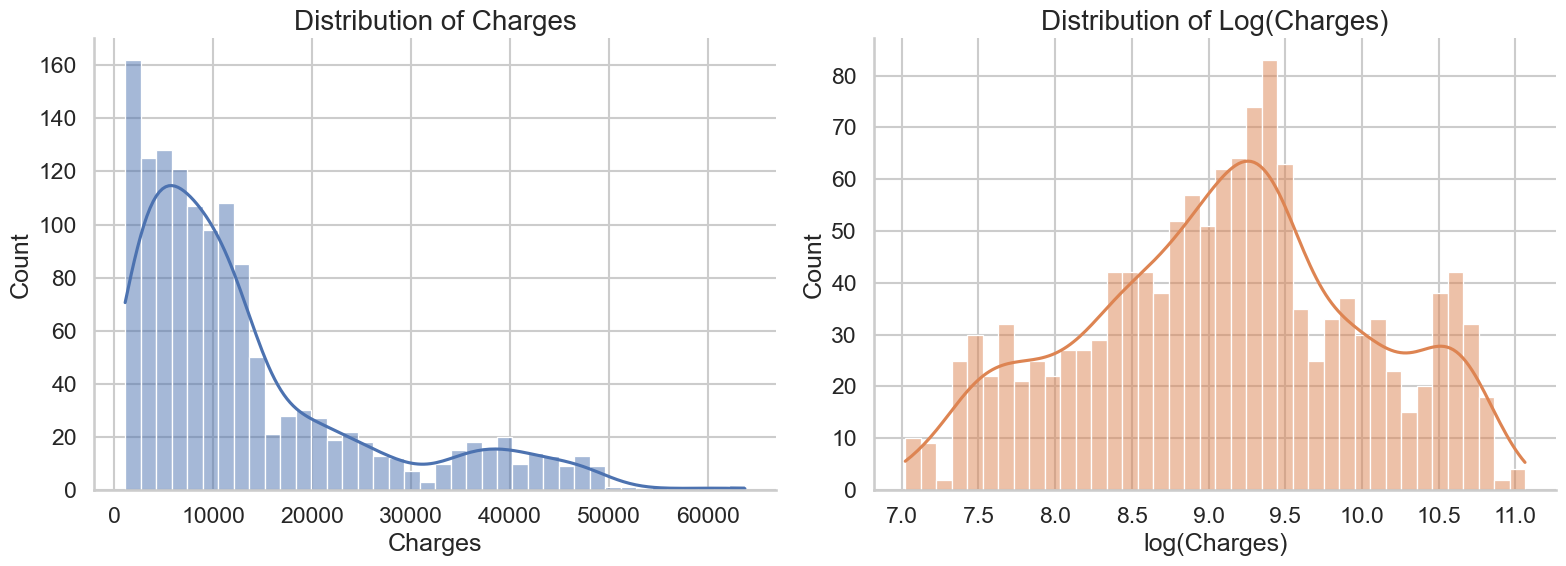

In [1]:
# =============================================================================
# 0. SETUP
# =============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

# =============================================================================
# 1. LOAD DATA & Exploratory Data Analysis
# =============================================================================
df = pd.read_csv("insurance.csv")

# Log-transform the target to stabilize variance
df["log_charges"] = np.log(df["charges"])
y = df["log_charges"].values
N = len(y)
# Set Aesthetic Style
sns.set(style="whitegrid", context="talk")

# Custom color palette
color1 = "#4C72B0"   # blue
color2 = "#DD8452"   # orange

# Plot Distribution of Charges
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# --- (A) Original charges (right-skewed) ---
sns.histplot(df["charges"], kde=True, color=color1, ax=ax[0], bins=40)
ax[0].set_title("Distribution of Charges", fontsize=20)
ax[0].set_xlabel("Charges")
ax[0].set_ylabel("Count")

# --- (B) Log-transformed charges ---
sns.histplot(df["log_charges"], kde=True, color=color2, ax=ax[1], bins=40)
ax[1].set_title("Distribution of Log(Charges)", fontsize=20)
ax[1].set_xlabel("log(Charges)")
ax[1].set_ylabel("Count")

# Remove top/right borders for clean look
sns.despine()

plt.tight_layout()
plt.show()

In [2]:
print("Age -> min:", df["age"].min(), "max:", df["age"].max(), "mean:", df["age"].mean())
print("BMI -> min:", df["bmi"].min(), "max:", df["bmi"].max(), "mean:", df["bmi"].mean())
print("Children -> unique values:", sorted(df["children"].unique()))
print("Charges -> min:", df["charges"].min(), "max:", df["charges"].max(), "mean:", df["charges"].mean())

Age -> min: 18 max: 64 mean: 39.20702541106129
BMI -> min: 15.96 max: 53.13 mean: 30.66339686098655
Children -> unique values: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
Charges -> min: 1121.8739 max: 63770.42801 mean: 13270.422265141257


In [3]:
# Select numeric variables
numeric_cols = ["age", "bmi", "children", "charges"]

# Compute summary statistics
summary = df[numeric_cols].describe().T

summary

count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801

In [4]:
# Categorical variables
cat_cols = ["sex", "smoker", "region"]

# Create summary table
cat_summary = {}

for col in cat_cols:
    counts = df[col].value_counts()
    perc = df[col].value_counts(normalize=True) * 100
    cat_summary[col] = pd.DataFrame({
        "Count": counts,
        "Percentage": perc.round(2)
    })

cat_summary

{'sex':         Count  Percentage
 sex                      
 male      676       50.52
 female    662       49.48,
 'smoker':         Count  Percentage
 smoker                   
 no       1064       79.52
 yes       274       20.48,
 'region':            Count  Percentage
 region                      
 southeast    364       27.20
 southwest    325       24.29
 northwest    325       24.29
 northeast    324       24.22}

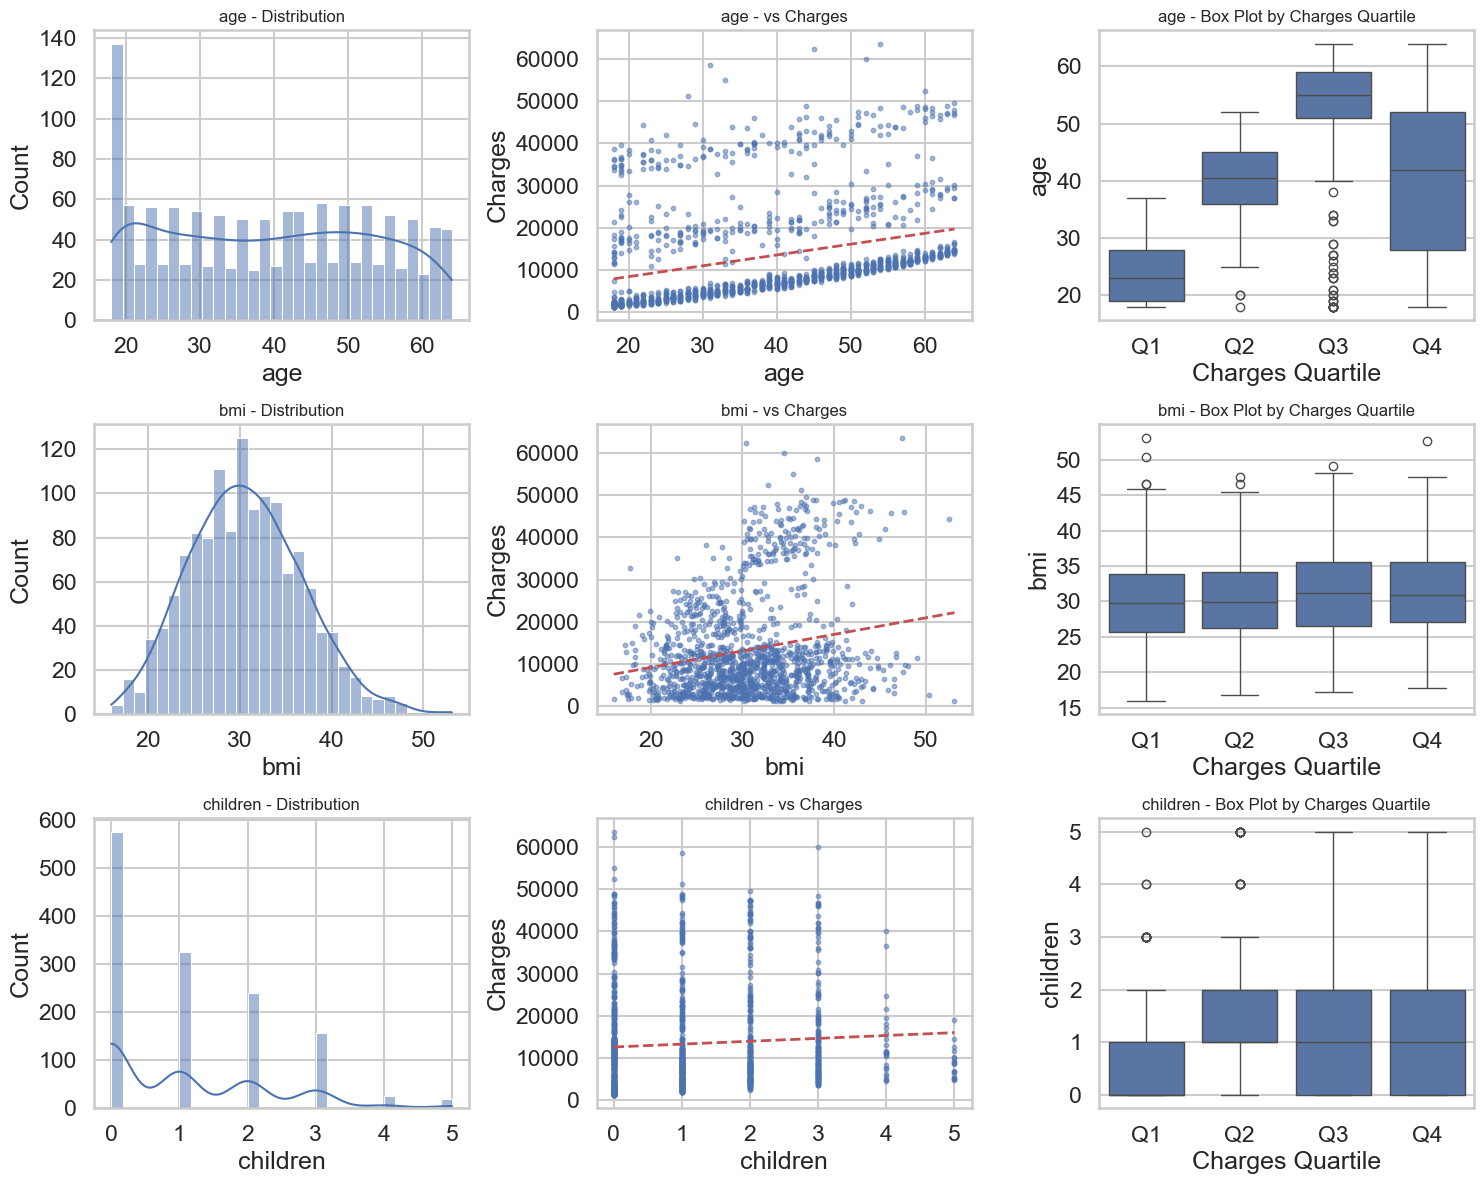

In [5]:
# VISUALIZING NUMERICAL FEATURES

numerical_features = ["age", "bmi", "children"]

# Create a grid of subplots:
# Rows = number of numerical features
# Columns = 3 plots per feature (Distribution, vs Charges, Box by quartile)
fig, axes = plt.subplots(len(numerical_features), 3,
                         figsize=(15, 4 * len(numerical_features)))
sns.set_theme(style="whitegrid")

# Ensure axes is always 2D (in case there is only one feature)
if len(numerical_features) == 1:
    axes = np.array([axes])

for i, feature in enumerate(numerical_features):
    # (1) Distribution: Histogram + KDE
    ax = axes[i, 0]
    sns.histplot(df[feature], bins=30, kde=True, ax=ax)
    ax.set_title(f"{feature} - Distribution")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

    # (2) Scatter plot vs Charges with linear trend line
    ax = axes[i, 1]
    ax.scatter(df[feature], df["charges"], alpha=0.5, s=10)
    ax.set_title(f"{feature} - vs Charges")
    ax.set_xlabel(feature)
    ax.set_ylabel("Charges")

    # Add linear trend line
    z = np.polyfit(df[feature], df["charges"], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(df[feature].min(), df[feature].max(), 100)
    ax.plot(x_trend, p(x_trend), "r--", linewidth=2)

    # (3) Box plot of feature grouped by charges quartiles
    ax = axes[i, 2]
    charges_quartiles = pd.qcut(df["charges"], q=4,
                                labels=["Q1", "Q2", "Q3", "Q4"])
    sns.boxplot(x=charges_quartiles, y=df[feature], ax=ax)
    ax.set_title(f"{feature} - Box Plot by Charges Quartile")
    ax.set_xlabel("Charges Quartile")
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()


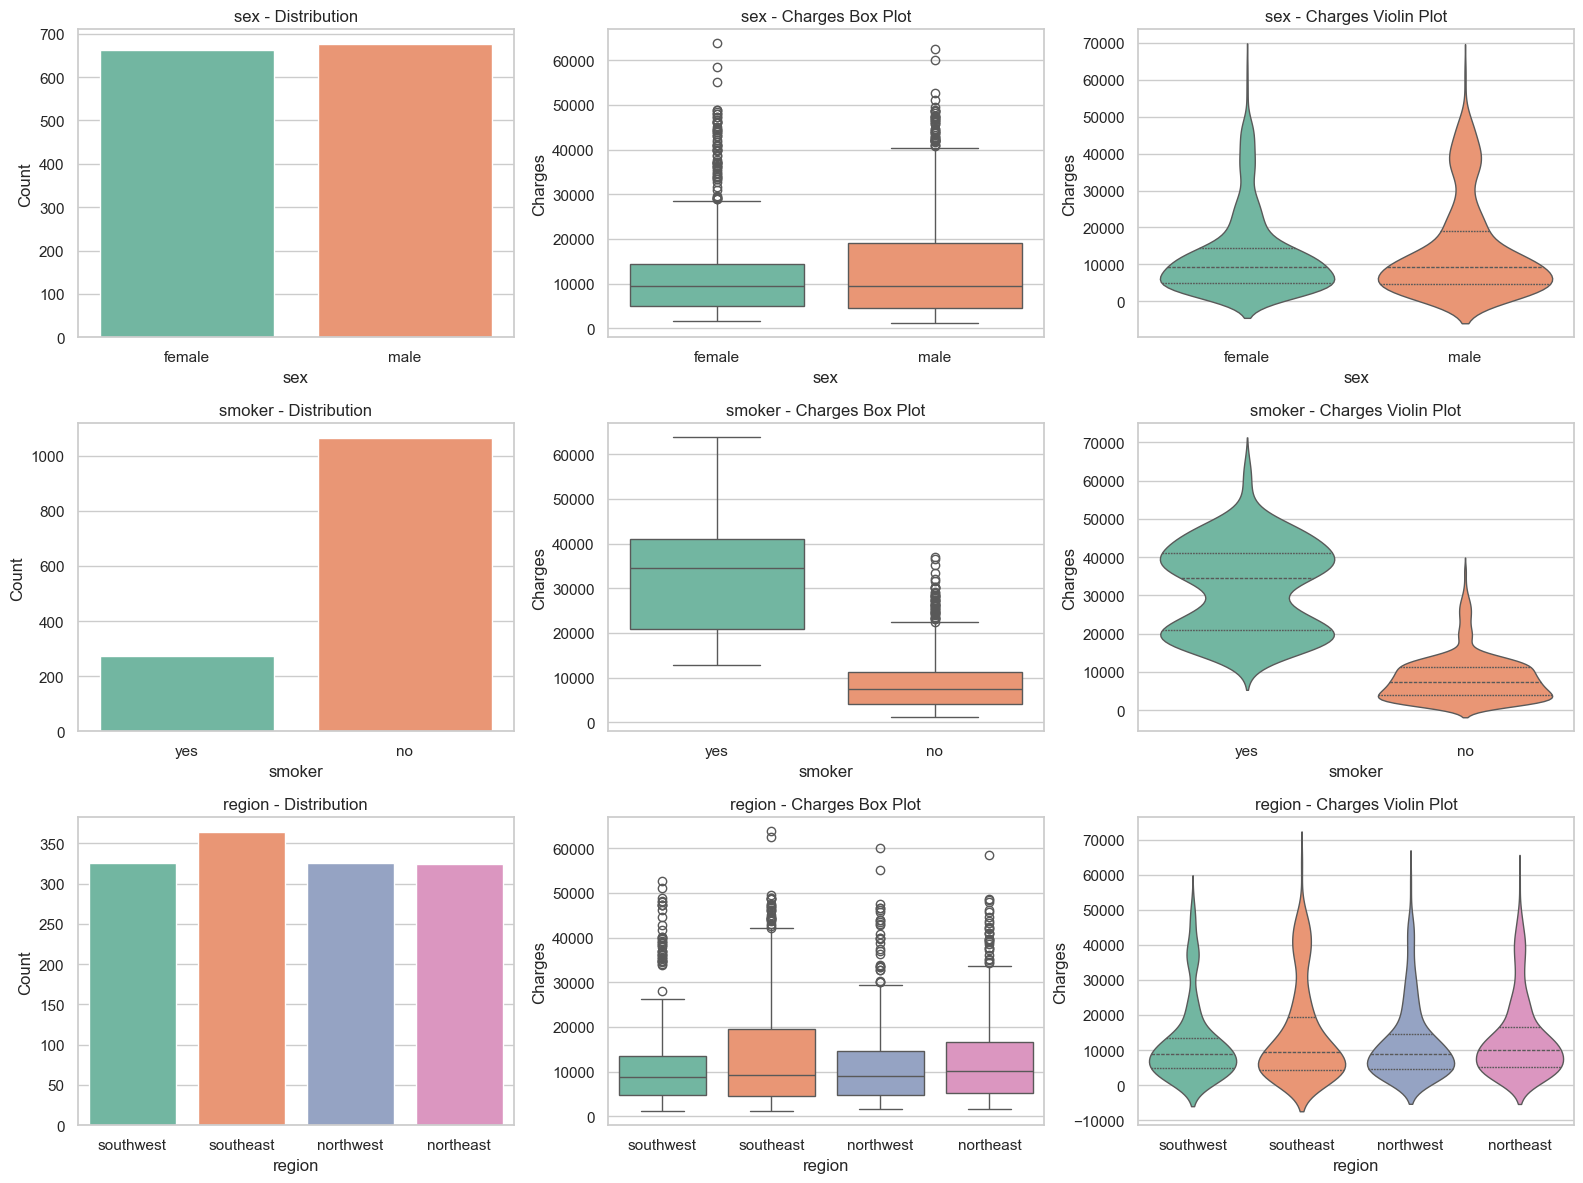

In [6]:
# CATEGORICAL FEATURES VISUALIZATION

categorical_features = ["sex", "smoker", "region"]

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(len(categorical_features), 3,
                         figsize=(16, 4 * len(categorical_features)))

if len(categorical_features) == 1:
    axes = np.array([axes])

for i, feature in enumerate(categorical_features):

    # (1) Bar Plot: distribution
    ax = axes[i, 0]
    sns.countplot(
        data=df, x=feature,
        hue=feature,   # <- Assign hue same as x
        palette="Set2", ax=ax,
        legend=False
    )
    ax.set_title(f"{feature} - Distribution")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

    # (2) Box Plot of charges by category
    ax = axes[i, 1]
    sns.boxplot(
        data=df, x=feature, y="charges",
        hue=feature, palette="Set2", ax=ax,
        legend=False
    )
    ax.set_title(f"{feature} - Charges Box Plot")
    ax.set_xlabel(feature)
    ax.set_ylabel("Charges")

    # (3) Violin Plot of charges by category
    ax = axes[i, 2]
    sns.violinplot(
        data=df, x=feature, y="charges",
        hue=feature, palette="Set2",
        ax=ax, inner="quartile", linewidth=1,
        legend=False
    )
    ax.set_title(f"{feature} - Charges Violin Plot")
    ax.set_xlabel(feature)
    ax.set_ylabel("Charges")

plt.tight_layout()
plt.show()


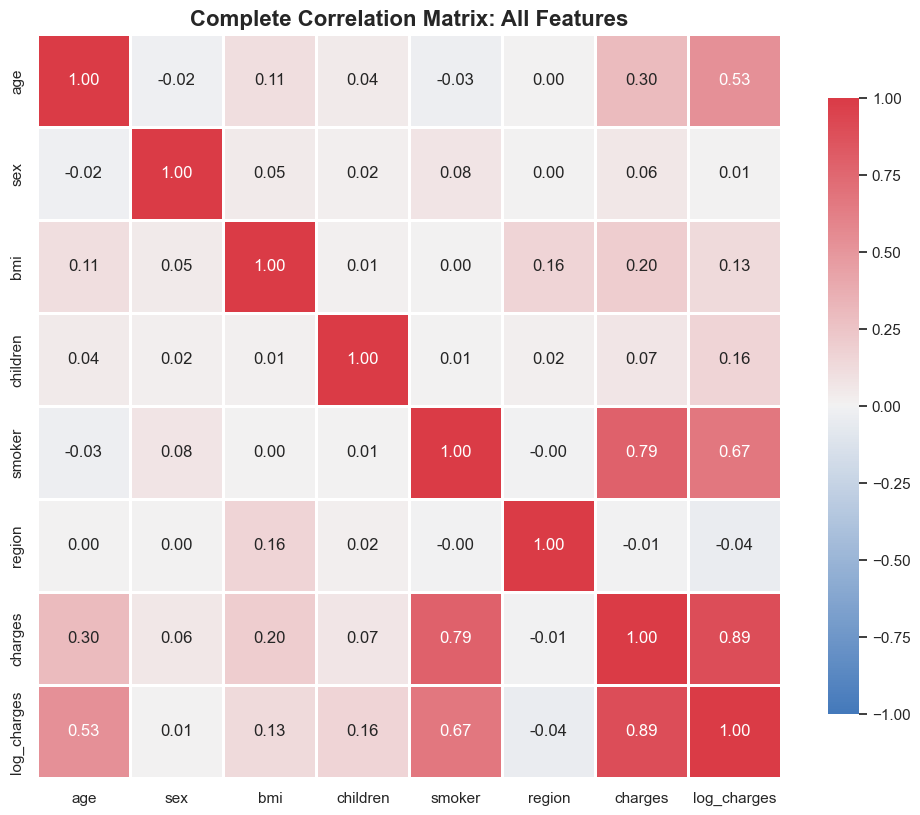

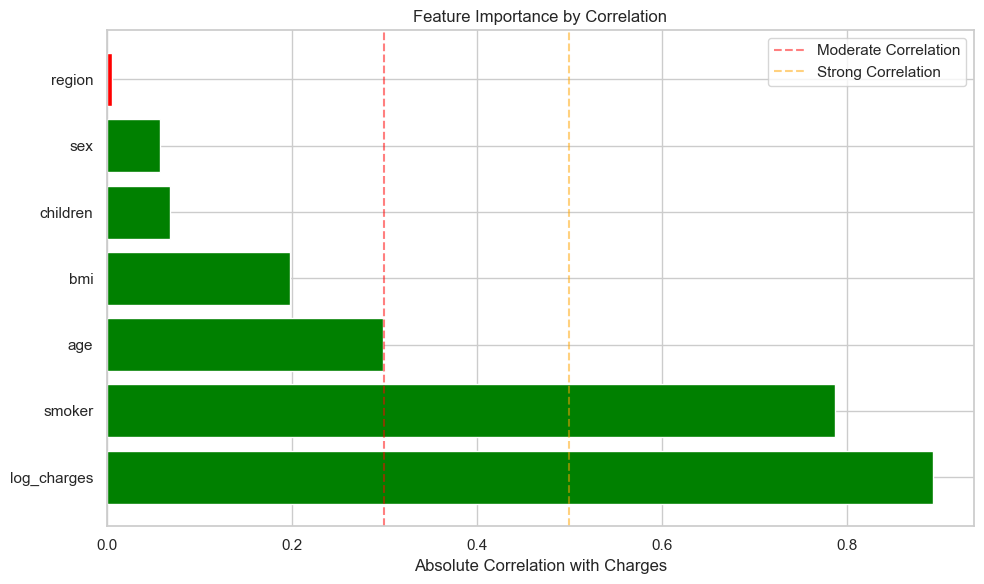

Correlation with Target (Charges):
log_charges: +0.893 (absolute: 0.893)
smoker: +0.787 (absolute: 0.787)
age: +0.299 (absolute: 0.299)
bmi: +0.198 (absolute: 0.198)
children: +0.068 (absolute: 0.068)
sex: +0.057 (absolute: 0.057)
region: -0.006 (absolute: 0.006)


In [7]:
from sklearn.preprocessing import LabelEncoder

# ADVANCED MULTIVARIATE ANALYSIS

# Encode categorical variables for correlation
df_encoded = df.copy()
label_encoders = {}

for cat_feature in categorical_features:
    le = LabelEncoder()
    df_encoded[cat_feature] = le.fit_transform(df[cat_feature])
    label_encoders[cat_feature] = le

# Full correlation matrix
full_corr_matrix = df_encoded.corr()

# Create enhanced heatmap
plt.figure(figsize=(12, 10))

# Create custom colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(full_corr_matrix, cmap=cmap, vmax=1, vmin=-1,
            center=0, square=True, linewidths=1, cbar_kws={"shrink": .8},
            annot=True, fmt='.2f')

plt.title('Complete Correlation Matrix: All Features', fontsize=16,
          fontweight='bold')
plt.show()

target_correlations = full_corr_matrix['charges'].abs().sort_values(ascending=False)[1:]

# Create bar plot
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red'
          for x in full_corr_matrix['charges'][target_correlations.index]]

plt.barh(target_correlations.index, target_correlations.values, color=colors)
plt.xlabel('Absolute Correlation with Charges')
plt.title('Feature Importance by Correlation')
plt.axvline(x=0.3, color='red', linestyle='--', alpha=0.5, label='Moderate Correlation')
plt.axvline(x=0.5, color='orange', linestyle='--', alpha=0.5, label='Strong Correlation')
plt.legend()
plt.tight_layout()
plt.show()

print("Correlation with Target (Charges):")
for feature, corr in target_correlations.items():
    actual_corr = full_corr_matrix['charges'][feature]
    print(f"{feature}: {actual_corr:+.3f} (absolute: {corr:.3f})")

In [8]:
# =============================================================================
# 2. BUILD MULTIPLE DESIGN MATRICES
# =============================================================================
# --- Standardize continuous predictors (store means & stds for later use) ---
scale_info = {}
for col in ["age", "bmi", "children"]:
    mean = df[col].mean()
    std = df[col].std()
    scale_info[col] = {"mean": mean, "std": std}
    df[col + "_std"] = (df[col] - mean) / std

# --- Polynomial terms ---
df["bmi_std_sq"] = df["bmi_std"] ** 2
df["age_std_sq"] = df["age_std"] ** 2

# --- Categorical predictors: one-hot encode, drop first level as baseline ---
X_cat = pd.get_dummies(df[["sex", "smoker", "region"]],
                       drop_first=True, dtype=float)

if "smoker_yes" not in X_cat.columns:
    raise ValueError("Expected column 'smoker_yes' after get_dummies.")

# --- Interaction terms ---
df["age_x_smoker"] = df["age_std"] * X_cat["smoker_yes"]
df["bmi_x_smoker"] = df["bmi_std"] * X_cat["smoker_yes"]
df["age_sq_x_smoker"] = df["age_std_sq"] * X_cat["smoker_yes"]

# --- SIMPLE SPLINE BASIS FOR AGE & BMI (for Model D) ---(We do not use this model)
# We'll use piecewise linear "truncated power" basis at 25%, 50%, 75% quantiles
age_knots = np.quantile(df["age_std"], [0.25, 0.5, 0.75])
bmi_knots = np.quantile(df["bmi_std"], [0.25, 0.5, 0.75])

for k, c in enumerate(age_knots):
    df[f"age_spline_{k}"] = np.maximum(df["age_std"] - c, 0.0)

for k, c in enumerate(bmi_knots):
    df[f"bmi_spline_{k}"] = np.maximum(df["bmi_std"] - c, 0.0)

# =============================================================================
# DESIGN MATRICES FOR DIFFERENT MODELS
# =============================================================================

# ===== Model A: Baseline (main effects only, no polys or interactions) =====
X_cont_A = df[["age_std", "bmi_std", "children_std"]]
X_full_A = pd.concat([X_cont_A, X_cat], axis=1)
X_A = np.column_stack([np.ones(N), X_full_A.to_numpy()])
param_names_A = ["alpha"] + list(X_full_A.columns)

# ===== Model B: BMI^2 + smoker interactions ===== (We do not use this model)
X_cont_B = df[["age_std", "bmi_std", "bmi_std_sq", "children_std"]]
X_full_B = pd.concat(
    [X_cont_B, X_cat, df[["age_x_smoker", "bmi_x_smoker"]]],
    axis=1
)
X_B = np.column_stack([np.ones(N), X_full_B.to_numpy()])
param_names_B = ["alpha"] + list(X_full_B.columns)

# ===== Model C: BMI^2 + AGE^2 + smoker interactions =====
X_cont_C = df[["age_std", "age_std_sq", "bmi_std", "bmi_std_sq", "children_std"]]
X_full_C = pd.concat(
    [X_cont_C, X_cat, df[["age_x_smoker", "bmi_x_smoker", "age_sq_x_smoker"]]],
    axis=1
)
X_C = np.column_stack([np.ones(N), X_full_C.to_numpy()])
param_names_C = ["alpha"] + list(X_full_C.columns)

# ===== Model D: Student-t + splines for age and BMI (nonlinear mean) =====
X_cont_D = df[
    ["age_std", "age_std_sq", "bmi_std", "bmi_std_sq", "children_std",
     "age_spline_0", "age_spline_1", "age_spline_2",
     "bmi_spline_0", "bmi_spline_1", "bmi_spline_2"]
]
X_full_D = pd.concat(
    [X_cont_D, X_cat, df[["age_x_smoker", "bmi_x_smoker", "age_sq_x_smoker"]]],
    axis=1
)
X_D = np.column_stack([np.ones(N), X_full_D.to_numpy()])
param_names_D = ["alpha"] + list(X_full_D.columns)

print("Number of observations:", N)
print("\nModel A (baseline) predictors:")
for name in param_names_A:
    print("  -", name)
print("\nModel B (extended) predictors:")
for name in param_names_B:
    print("  -", name)
print("\nModel C (extended + age^2) predictors:")
for name in param_names_C:
    print("  -", name)
print("\nModel D (Student-t + splines) predictors:")
for name in param_names_D:
    print("  -", name)


Number of observations: 1338

Model A (baseline) predictors:
  - alpha
  - age_std
  - bmi_std
  - children_std
  - sex_male
  - smoker_yes
  - region_northwest
  - region_southeast
  - region_southwest

Model B (extended) predictors:
  - alpha
  - age_std
  - bmi_std
  - bmi_std_sq
  - children_std
  - sex_male
  - smoker_yes
  - region_northwest
  - region_southeast
  - region_southwest
  - age_x_smoker
  - bmi_x_smoker

Model C (extended + age^2) predictors:
  - alpha
  - age_std
  - age_std_sq
  - bmi_std
  - bmi_std_sq
  - children_std
  - sex_male
  - smoker_yes
  - region_northwest
  - region_southeast
  - region_southwest
  - age_x_smoker
  - bmi_x_smoker
  - age_sq_x_smoker

Model D (Student-t + splines) predictors:
  - alpha
  - age_std
  - age_std_sq
  - bmi_std
  - bmi_std_sq
  - children_std
  - age_spline_0
  - age_spline_1
  - age_spline_2
  - bmi_spline_0
  - bmi_spline_1
  - bmi_spline_2
  - sex_male
  - smoker_yes
  - region_northwest
  - region_southeast
  - region_s

In [9]:

# =============================================================================
# 3. GIBBS SAMPLERS
# =============================================================================

def gibbs_linear_regression(y, X, n_iter=6000, m0=None, V0=None,
                            a0=2.0, b0=1.0):
    """
    Conjugate Gibbs sampler for homoscedastic Normal linear regression:
        y | beta, sigma^2 ~ N(X beta, sigma^2 I)
        beta ~ N(m0, V0)
        sigma^2 ~ Inv-Gamma(a0, b0)
    Returns:
        beta_samples: (n_iter, P)
        sigma2_samples: (n_iter,)
    """
    N, P = X.shape
    if m0 is None:
        m0 = np.zeros(P)
    if V0 is None:
        V0 = (100.0 ** 2) * np.eye(P)

    V0_inv = np.linalg.inv(V0)

    # initialize
    beta = np.zeros(P)
    sigma2 = 1.0

    beta_samples = np.zeros((n_iter, P))
    sigma2_samples = np.zeros(n_iter)

    XtX = X.T @ X
    Xty = X.T @ y

    for t in range(n_iter):
        # beta | sigma2, y
        Vn_inv = XtX / sigma2 + V0_inv
        Vn = np.linalg.inv(Vn_inv)
        mn = Vn @ (Xty / sigma2 + V0_inv @ m0)
        beta = np.random.multivariate_normal(mn, Vn)

        # sigma2 | beta, y
        resid = y - X @ beta
        an = a0 + N / 2.0
        bn = b0 + 0.5 * np.dot(resid, resid)
        sigma2 = 1.0 / np.random.gamma(shape=an, scale=1.0 / bn)

        beta_samples[t] = beta
        sigma2_samples[t] = sigma2

    return beta_samples, sigma2_samples


def gibbs_student_t_regression(y, X, nu=4.0, n_iter=6000, m0=None, V0=None,
                               a0=2.0, b0=1.0):
    """
    Gibbs sampler for Student-t regression using scale-mixture representation:
        y_i | beta, sigma^2, lambda_i ~ N(X_i beta, sigma^2 / lambda_i)
        lambda_i ~ Gamma(nu/2, nu/2)
        beta ~ N(m0, V0)
        sigma^2 ~ Inv-Gamma(a0, b0)
    Returns:
        beta_samples: (n_iter, P)
        sigma2_samples: (n_iter,)
    """
    N, P = X.shape
    if m0 is None:
        m0 = np.zeros(P)
    if V0 is None:
        V0 = (100.0 ** 2) * np.eye(P)

    V0_inv = np.linalg.inv(V0)
    beta = np.zeros(P)
    sigma2 = 1.0
    lambdas = np.ones(N)

    beta_samples = np.zeros((n_iter, P))
    sigma2_samples = np.zeros(n_iter)

    for t in range(n_iter):
        # 1) beta | sigma2, lambda, y (weighted regression)
        w = np.sqrt(lambdas)
        X_tilde = X * w[:, None]
        y_tilde = y * w

        XtX = X_tilde.T @ X_tilde
        Xty = X_tilde.T @ y_tilde

        Vn_inv = XtX / sigma2 + V0_inv
        Vn = np.linalg.inv(Vn_inv)
        mn = Vn @ (Xty / sigma2 + V0_inv @ m0)
        beta = np.random.multivariate_normal(mn, Vn)

        # 2) sigma^2 | beta, lambda, y
        resid = y - X @ beta
        an = a0 + N / 2.0
        bn = b0 + 0.5 * np.sum(lambdas * resid**2)
        sigma2 = 1.0 / np.random.gamma(shape=an, scale=1.0 / bn)

        # 3) lambda_i | beta, sigma^2, y  (Gamma)
        shape = (nu + 1.0) / 2.0
        for i in range(N):
            r2 = (y[i] - X[i, :] @ beta) ** 2
            rate = (nu + r2 / sigma2) / 2.0
            lambdas[i] = np.random.gamma(shape=shape, scale=1.0 / rate)

        beta_samples[t] = beta
        sigma2_samples[t] = sigma2

    return beta_samples, sigma2_samples


In [10]:

# =============================================================================
# 4. MCMC UTILITIES: ACF, ESS, R-HAT
# =============================================================================
def autocorr(x, max_lag=40):
    x = np.asarray(x)
    x = x - x.mean()
    var = np.dot(x, x) / len(x)
    acf = np.empty(max_lag + 1)
    acf[0] = 1.0
    for lag in range(1, max_lag + 1):
        v = np.dot(x[:-lag], x[lag:]) / ((len(x) - lag) * var)
        acf[lag] = v
    return acf

def effective_sample_size(x, max_lag=100):
    x = np.asarray(x)
    N = len(x)
    acf = autocorr(x, max_lag=max_lag)
    rho = acf[1:]
    positive_rho = rho[rho > 0]
    if len(positive_rho) == 0:
        tau = 1.0
    else:
        tau = 1.0 + 2.0 * positive_rho.sum()
    ess = N / tau
    return ess, acf

def plot_param_diagnostics(chains, param_name, model_label,
                           max_lag=40, bins=40):
    """
    Produce a 2x2 diagnostic panel for a single parameter:

    - chains : array of shape (n_chains, n_iter_per_chain)
    """
    chains = np.asarray(chains)
    m, n = chains.shape

    # Flatten across chains for ESS / ACF and density
    flat = chains.reshape(-1)

    # ESS + ACF using existing utilities
    ess_val, acf_vals = effective_sample_size(flat, max_lag=max_lag)
    rhat_val = rhat(chains)

    # Basic summary stats
    mean = flat.mean()
    sd = flat.std()
    lo, hi = np.percentile(flat, [2.5, 97.5])

    lags = np.arange(len(acf_vals))

    fig, axes = plt.subplots(2, 2, figsize=(10, 6))

    # (1) Trace plots for all chains
    ax = axes[0, 0]
    for c in range(m):
        ax.plot(chains[c], alpha=0.7, label=f"chain {c+1}")
    ax.set_title("Trace plot")
    ax.set_xlabel("Iteration")
    ax.set_ylabel(param_name)
    if m <= 5:
        ax.legend(fontsize=8)

    # (2) Posterior density (histogram)
    ax = axes[0, 1]
    ax.hist(flat, bins=bins, density=True, alpha=0.7)
    ax.set_title("Posterior density")
    ax.set_xlabel(param_name)
    ax.set_ylabel("Density")

    # (3) Autocorrelation function (Matplotlib 3.8+ compatible)
    ax = axes[1, 0]
    markerline, stemlines, baseline = ax.stem(lags, acf_vals)
    plt.setp(stemlines, linewidth=1)   # optional style
    plt.setp(markerline, markersize=4)
    ax.set_title("Autocorrelation")
    ax.set_xlabel("Lag")
    ax.set_ylabel("ACF")

    # (4) Text panel: ESS, R-hat, summary stats
    ax = axes[1, 1]
    ax.axis("off")
    text = (
        f"Model: {model_label}\n"
        f"Parameter: {param_name}\n\n"
        f"ESS   = {ess_val: .1f}\n"
        f"R-hat = {rhat_val: .3f}\n\n"
        f"Mean  = {mean: .3f}\n"
        f"SD    = {sd: .3f}\n"
        f"95% CI= ({lo: .3f}, {hi: .3f})\n"
        f"N draws = {flat.size}"
    )
    ax.text(0.05, 0.95, text, va="top", fontsize=10)

    fig.suptitle(f"MCMC diagnostics – {model_label} – {param_name}",
                 fontsize=14)
    fig.tight_layout()
    plt.show()

    return ess_val, rhat_val


def rhat(chains_matrix):
    chains_matrix = np.asarray(chains_matrix)
    m, n = chains_matrix.shape
    chain_means = chains_matrix.mean(axis=1)
    chain_vars = chains_matrix.var(axis=1, ddof=1)
    B = n * chain_means.var(ddof=1)
    W = chain_vars.mean()
    var_hat = (n - 1) / n * W + B / n
    return np.sqrt(var_hat / W)


In [11]:

# =============================================================================
# 5. WRAPPERS TO RUN MODELS (NORMAL & STUDENT-T)
# =============================================================================
def run_gibbs_model(y, X, param_names, model_label,
                    m0_scale=100.0, n_chains=4, n_iter=6000, burn_in=2000):
    """
    Normal-error model (A, B, C, S).
    """
    N, P = X.shape
    m0 = np.zeros(P)
    V0 = (m0_scale ** 2) * np.eye(P)

    beta_chains = []
    sigma2_chains = []

    print("\n============================")
    print(f"Running model: {model_label}")
    print("============================")
    print(f"Prior scale for beta: N(0, {m0_scale}^2)")

    # Run independent chains
    for chain in range(n_chains):
        print(f"Chain {chain+1}/{n_chains}...")
        beta_samps, sigma2_samps = gibbs_linear_regression(
            y, X, n_iter=n_iter, m0=m0, V0=V0
        )
        beta_chains.append(beta_samps[burn_in:])
        sigma2_chains.append(sigma2_samps[burn_in:])

    # Stack across chains
    beta_array = np.stack(beta_chains, axis=0)     # (C, S, P)
    sigma2_array = np.stack(sigma2_chains, axis=0) # (C, S)

    C, S, P = beta_array.shape
    beta_post = beta_array.reshape(-1, P)          # (C*S, P)
    sigma2_post = sigma2_array.reshape(-1)         # (C*S,)

    n_keep_total = C * S
    print(f"\nMCMC sample size for {model_label}: {n_keep_total} draws")

    # ============================
    # MCMC diagnostics for ALL parameters
    # ============================
    print("\nConvergence diagnostics (ESS, R-hat, ACF, trace) for ALL parameters:")

    diag_rows = []

    # All regression coefficients
    for j, pname in enumerate(param_names):
        chains_matrix = beta_array[:, :, j]  # (n_chains, n_iter)
        ess_val, rhat_val = plot_param_diagnostics(
            chains_matrix,
            param_name=pname,
            model_label=model_label,
            max_lag=100
        )
        diag_rows.append(
            {"parameter": pname, "ESS": ess_val, "Rhat": rhat_val}
        )

    # Sigma^2 as another parameter
    ess_sigma, rhat_sigma = plot_param_diagnostics(
        sigma2_array,              # (n_chains, n_iter)
        param_name="sigma^2",
        model_label=model_label,
        max_lag=100
    )
    diag_rows.append(
        {"parameter": "sigma^2", "ESS": ess_sigma, "Rhat": rhat_sigma}
    )

    # Summary table
    print("\nSummary of MCMC diagnostics for all parameters:")
    diag_df = pd.DataFrame(diag_rows)
    print(diag_df.to_string(index=False))

    # Return everything needed downstream
    return {
        "label": model_label,
        "X": X,
        "param_names": param_names,
        "beta_array": beta_array,
        "sigma2_array": sigma2_array,
        "beta_post": beta_post,
        "sigma2_post": sigma2_post,
        "dist": "normal",
        "nu": None
    }


def run_gibbs_model_student(y, X, param_names, model_label,
                            nu=4.0, m0_scale=100.0,
                            n_chains=4, n_iter=6000, burn_in=2000):
    """
    Student-t error model (Model D).
    """
    N, P = X.shape
    m0 = np.zeros(P)
    V0 = (m0_scale ** 2) * np.eye(P)

    beta_chains = []
    sigma2_chains = []

    print("\n============================")
    print(f"Running model: {model_label}")
    print("============================")
    print(f"Student-t df nu = {nu}")
    print(f"Prior scale for beta: N(0, {m0_scale}^2)")

    # Run independent chains
    for chain in range(n_chains):
        print(f"Chain {chain+1}/{n_chains}...")
        beta_samps, sigma2_samps = gibbs_student_t_regression(
            y, X, nu=nu, n_iter=n_iter, m0=m0, V0=V0
        )
        beta_chains.append(beta_samps[burn_in:])
        sigma2_chains.append(sigma2_samps[burn_in:])

    # Stack across chains
    beta_array = np.stack(beta_chains, axis=0)     # (C, S, P)
    sigma2_array = np.stack(sigma2_chains, axis=0) # (C, S)

    C, S, P = beta_array.shape
    beta_post = beta_array.reshape(-1, P)
    sigma2_post = sigma2_array.reshape(-1)
    n_keep_total = C * S

    print(f"\nMCMC sample size for {model_label}: {n_keep_total} draws")

    # ============================
    # MCMC diagnostics for ALL parameters
    # ============================
    print("\nConvergence diagnostics (ESS, R-hat, ACF, trace) for ALL parameters:")

    diag_rows = []

    # All regression coefficients
    for j, pname in enumerate(param_names):
        chains_matrix = beta_array[:, :, j]
        ess_val, rhat_val = plot_param_diagnostics(
            chains_matrix,
            param_name=pname,
            model_label=model_label,
            max_lag=100
        )
        diag_rows.append(
            {"parameter": pname, "ESS": ess_val, "Rhat": rhat_val}
        )

    # Sigma^2
    ess_sigma, rhat_sigma = plot_param_diagnostics(
        sigma2_array,
        param_name="sigma^2",
        model_label=model_label,
        max_lag=100
    )
    diag_rows.append(
        {"parameter": "sigma^2", "ESS": ess_sigma, "Rhat": rhat_sigma}
    )

    # Summary table
    print("\nSummary of MCMC diagnostics for all parameters:")
    diag_df = pd.DataFrame(diag_rows)
    print(diag_df.to_string(index=False))

    return {
        "label": model_label,
        "X": X,
        "param_names": param_names,
        "beta_array": beta_array,
        "sigma2_array": sigma2_array,
        "beta_post": beta_post,
        "sigma2_post": sigma2_post,
        "dist": "student_t",
        "nu": nu
    }


In [12]:

# =============================================================================
# 6. POSTERIOR SUMMARY & PREDICTION UTILITIES
# =============================================================================
def summarize_posterior(samples):
    mean = np.mean(samples)
    sd = np.std(samples)
    lo, hi = np.percentile(samples, [2.5, 97.5])
    return mean, sd, lo, hi

def posterior_predictive(model, y_log_true, max_draws_for_ppc=2000):
    """
    Posterior predictive for all observations in this model.
    Handles Normal or Student-t errors based on model["dist"].
    """
    X = model["X"]
    beta_post = model["beta_post"]
    sigma2_post = model["sigma2_post"]
    dist = model["dist"]
    nu = model["nu"]

    N = X.shape[0]
    n_keep = beta_post.shape[0]
    step = max(1, n_keep // max_draws_for_ppc)

    beta_ppc = beta_post[::step]
    sigma2_ppc = sigma2_post[::step]
    n_ppc = beta_ppc.shape[0]

    y_rep_log = np.zeros((n_ppc, N))

    for i in range(n_ppc):
        mu_i = X @ beta_ppc[i]
        if dist == "normal":
            eps_i = np.random.normal(
                loc=0.0, scale=np.sqrt(sigma2_ppc[i]), size=N
            )
        elif dist == "student_t":
            # Sample lambda ~ Gamma(nu/2, nu/2) for each predictive draw
            lam = np.random.gamma(shape=nu/2.0, scale=2.0/nu, size=N)
            eps_i = np.random.normal(
                loc=0.0, scale=np.sqrt(sigma2_ppc[i] / lam), size=N
            )
        else:
            raise ValueError("Unknown model dist")
        y_rep_log[i] = mu_i + eps_i

    y_true_charges = np.exp(y_log_true)
    y_pred_log_mean = y_rep_log.mean(axis=0)
    y_pred_mean = np.exp(y_pred_log_mean)

    lower_log = np.percentile(y_rep_log, 2.5, axis=0)
    upper_log = np.percentile(y_rep_log, 97.5, axis=0)
    lower = np.exp(lower_log)
    upper = np.exp(upper_log)

    coverage = np.mean((y_true_charges >= lower) & (y_true_charges <= upper))
    rmse = np.sqrt(np.mean((y_true_charges - y_pred_mean) ** 2))
    mae = np.mean(np.abs(y_true_charges - y_pred_mean))

    print(f"\nPosterior predictive performance for {model['label']}:")
    print(f"  RMSE (charges) = {rmse:,.2f}")
    print(f"  MAE  (charges) = {mae:,.2f}")
    print(f"  Empirical coverage of 95% PI = {coverage*100:.1f}%")

    plt.figure(figsize=(6, 6))
    plt.scatter(y_true_charges, y_pred_mean, alpha=0.4)
    min_c = min(y_true_charges.min(), y_pred_mean.min())
    max_c = max(y_true_charges.max(), y_pred_mean.max())
    plt.plot([min_c, max_c], [min_c, max_c], linestyle="--")
    plt.xlabel("Observed charges")
    plt.ylabel("Posterior predictive mean charges")
    plt.title(f"Observed vs Predicted Charges ({model['label']})")
    plt.tight_layout()
    plt.show()

    plt.hist(y_true_charges, bins=30, alpha=0.5, label="Observed")
    plt.hist(y_pred_mean, bins=30, alpha=0.5, label="Predicted mean")
    plt.xlabel("Charges")
    plt.ylabel("Frequency")
    plt.title(f"Distribution check ({model['label']})")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {
        "y_pred_mean": y_pred_mean,
        "lower": lower,
        "upper": upper,
        "rmse": rmse,
        "mae": mae,
        "coverage": coverage
    }



Running model: Model A (main effects)
Prior scale for beta: N(0, 100.0^2)
Chain 1/4...
Chain 2/4...
Chain 3/4...
Chain 4/4...

MCMC sample size for Model A (main effects): 16000 draws

Convergence diagnostics (ESS, R-hat, ACF, trace) for ALL parameters:


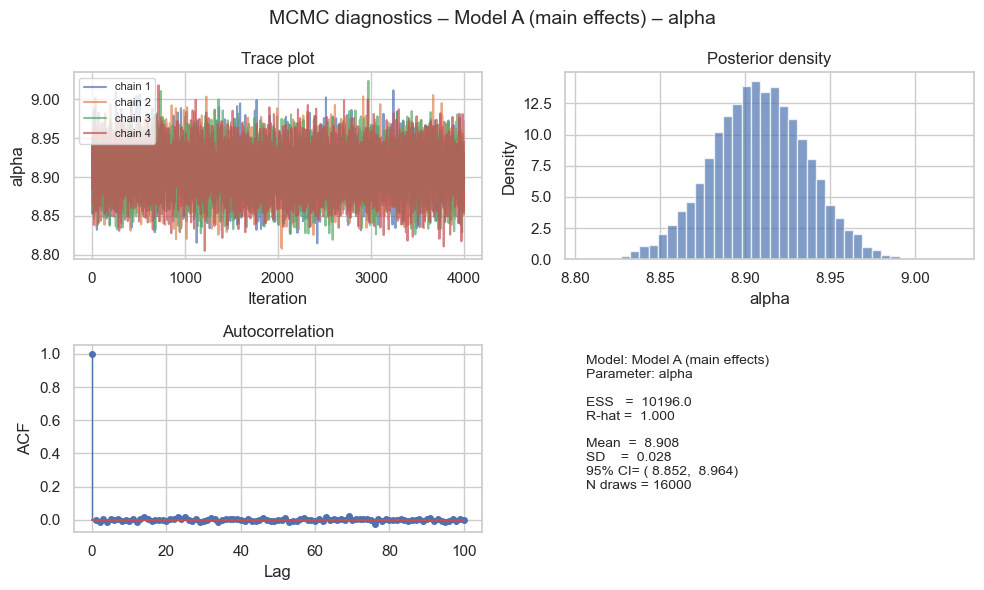

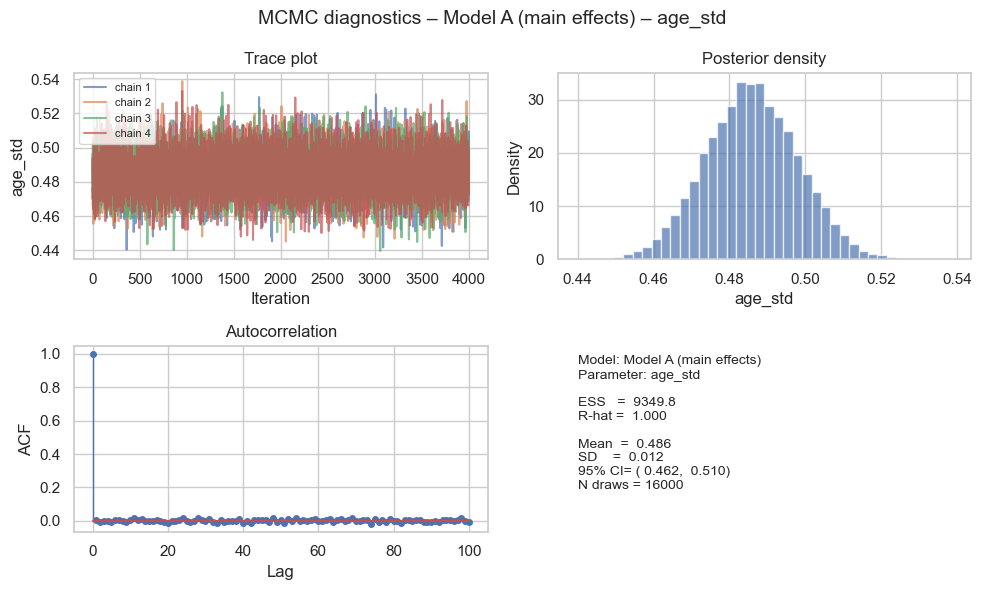

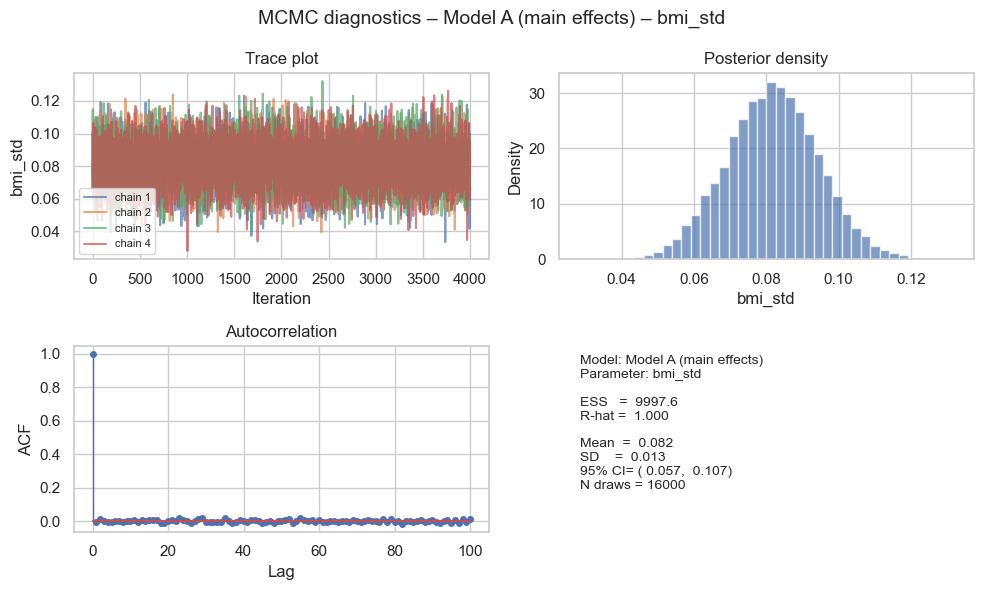

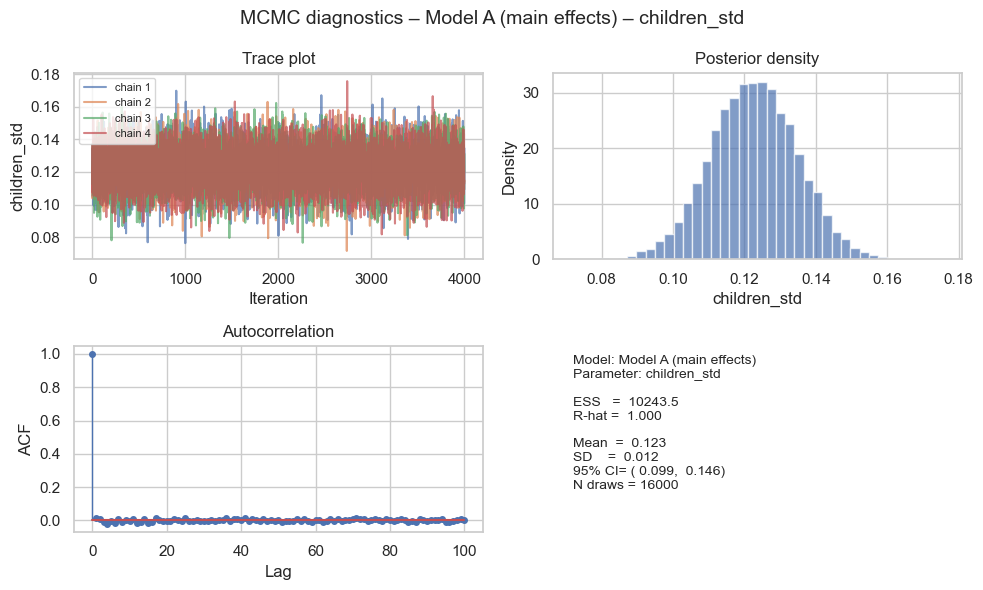

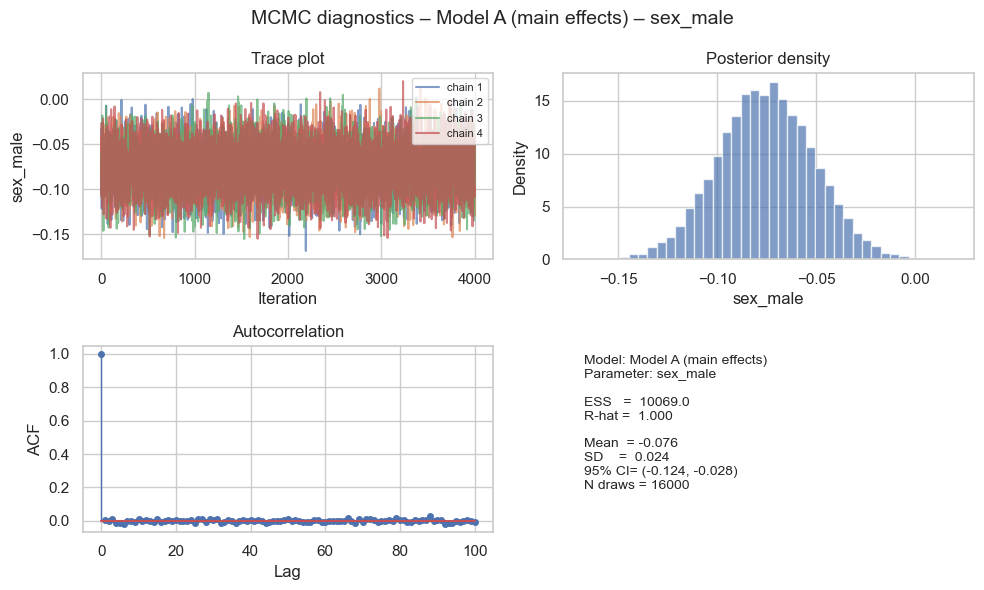

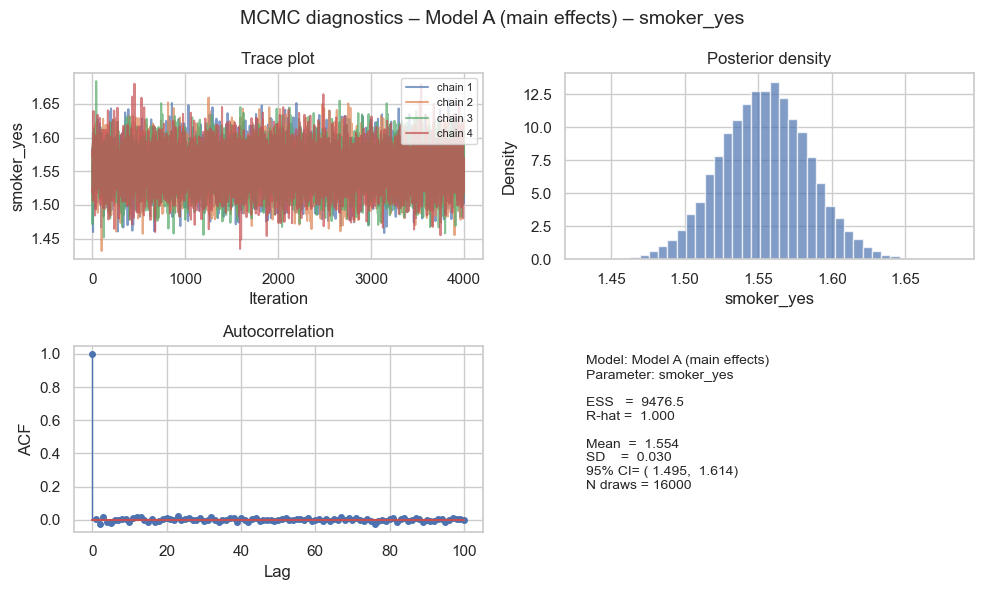

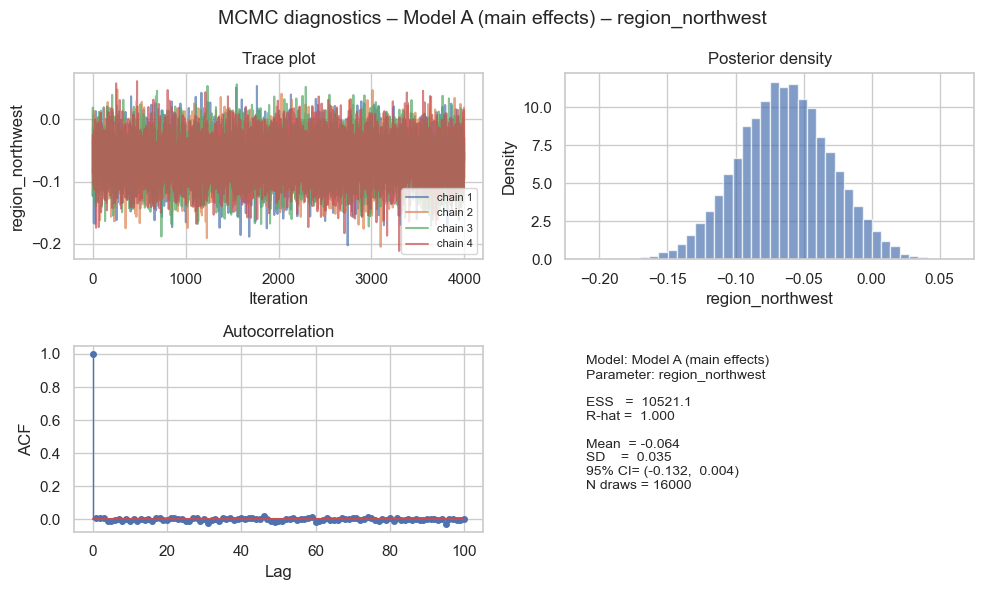

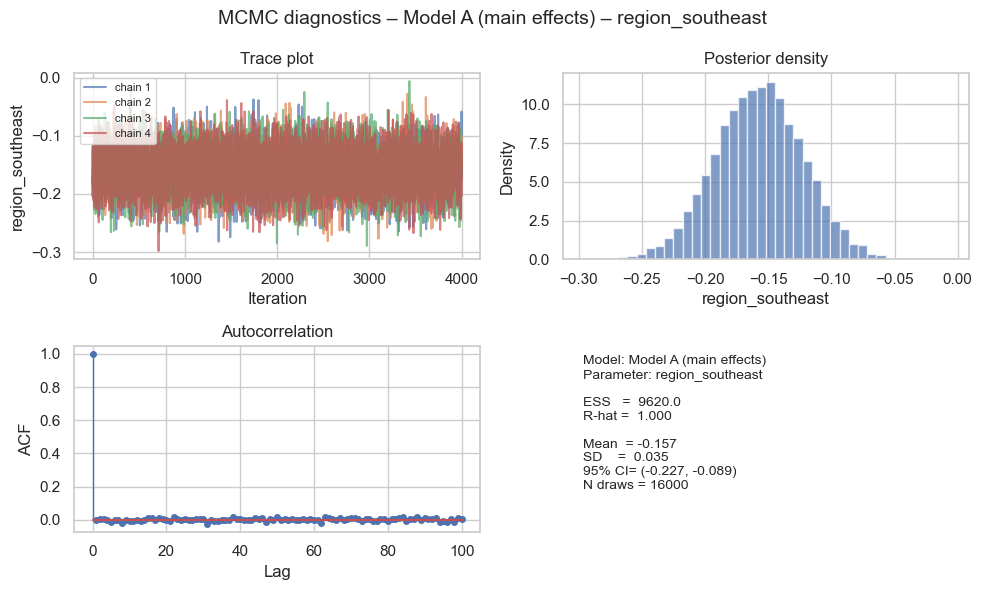

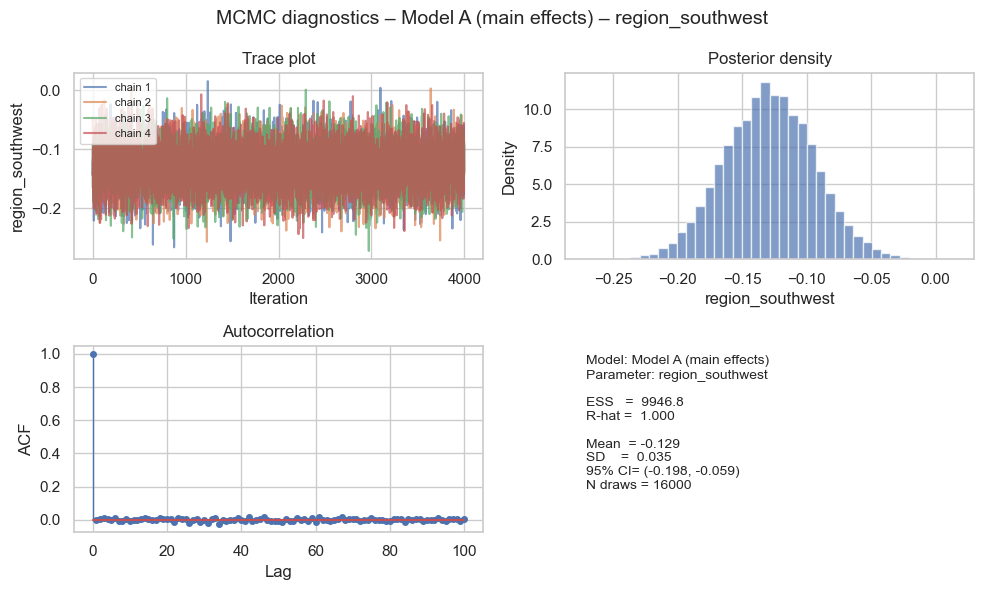

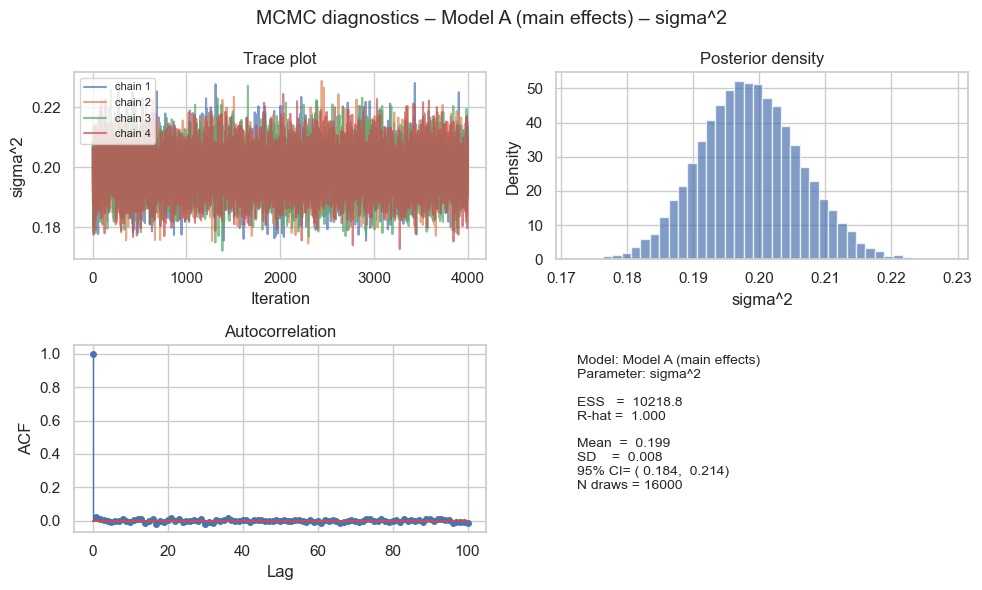


Summary of MCMC diagnostics for all parameters:
       parameter          ESS     Rhat
           alpha 10196.007343 0.999967
         age_std  9349.811936 1.000126
         bmi_std  9997.579984 0.999954
    children_std 10243.538177 0.999969
        sex_male 10068.962226 0.999975
      smoker_yes  9476.528740 0.999903
region_northwest 10521.121030 1.000148
region_southeast  9620.016735 0.999905
region_southwest  9946.767883 0.999934
         sigma^2 10218.820978 0.999953

Running model: Model C (BMI^2 + age^2 + smoker interactions)
Prior scale for beta: N(0, 100.0^2)
Chain 1/4...
Chain 2/4...
Chain 3/4...
Chain 4/4...

MCMC sample size for Model C (BMI^2 + age^2 + smoker interactions): 16000 draws

Convergence diagnostics (ESS, R-hat, ACF, trace) for ALL parameters:


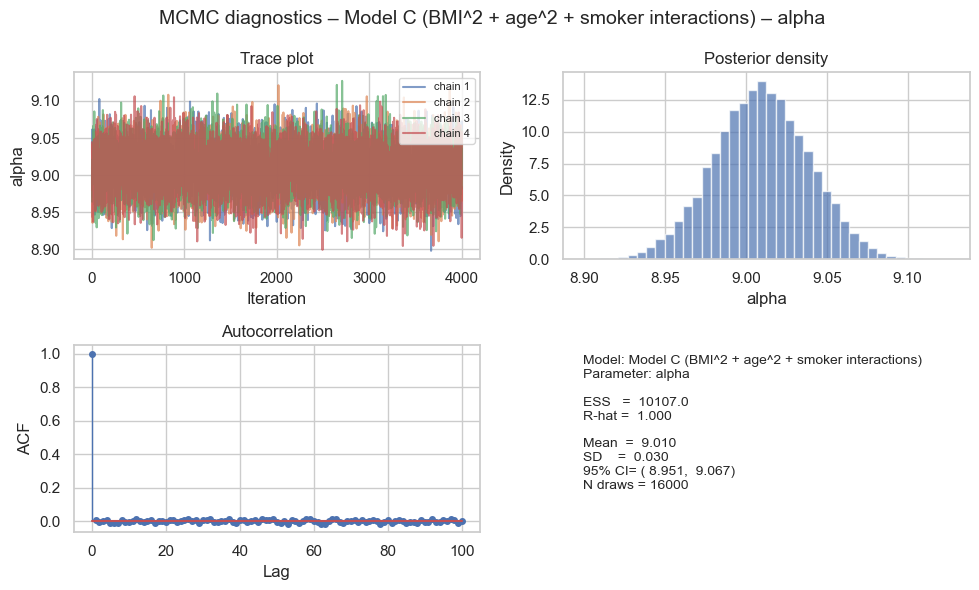

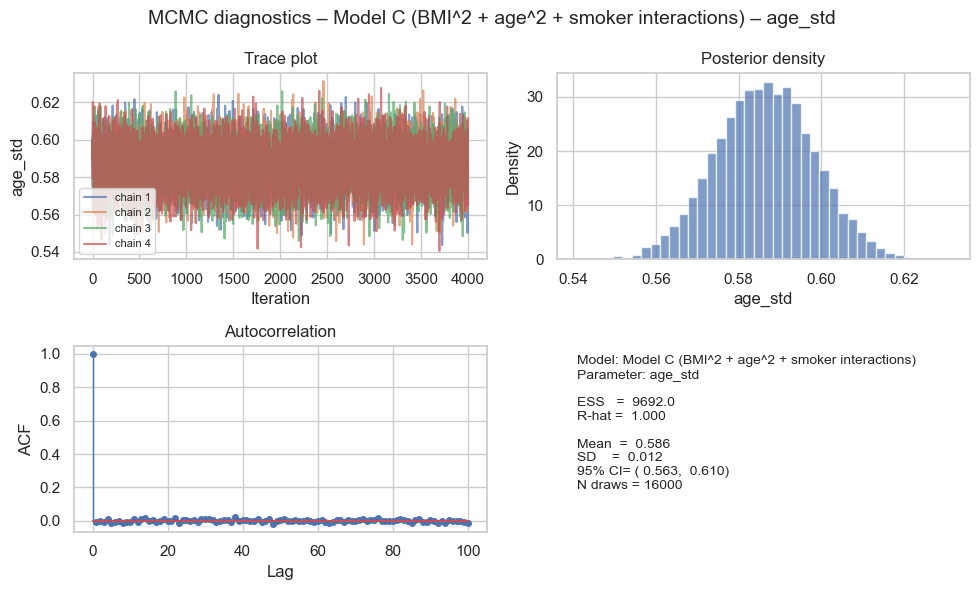

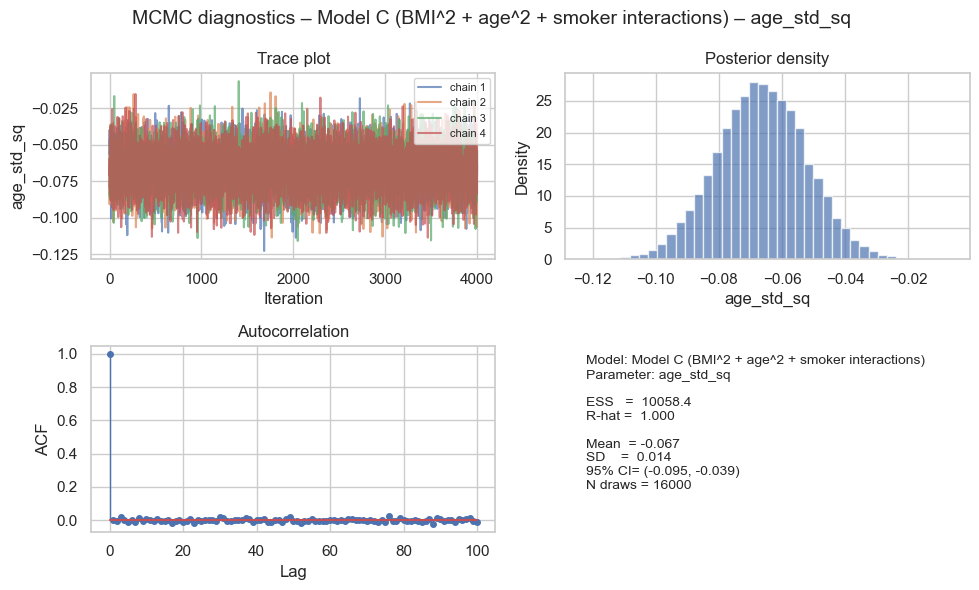

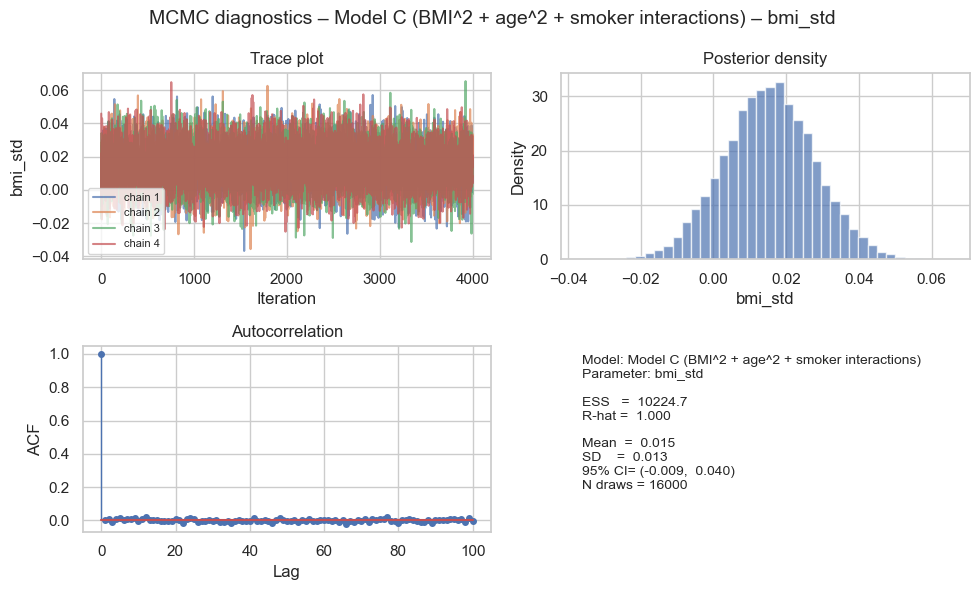

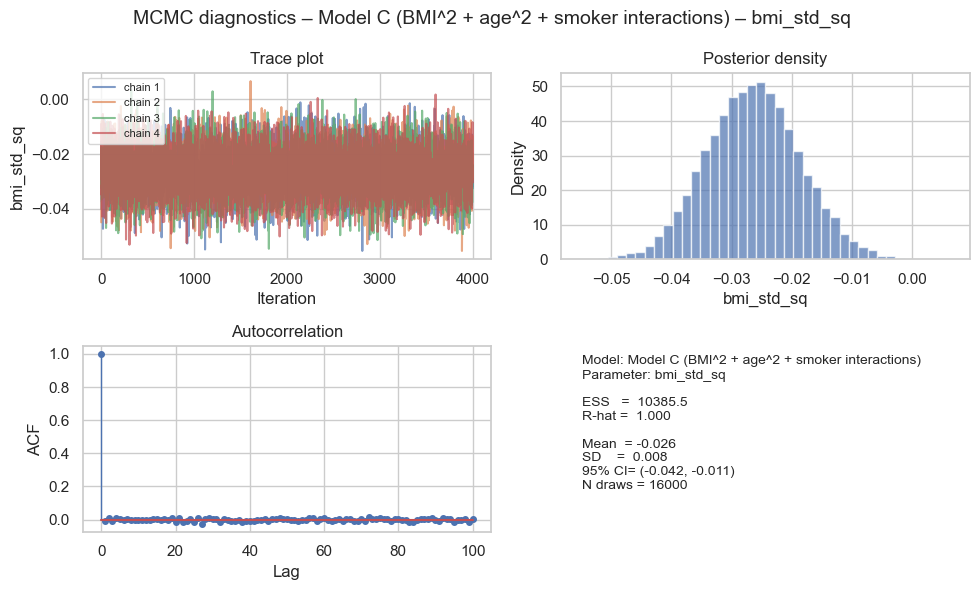

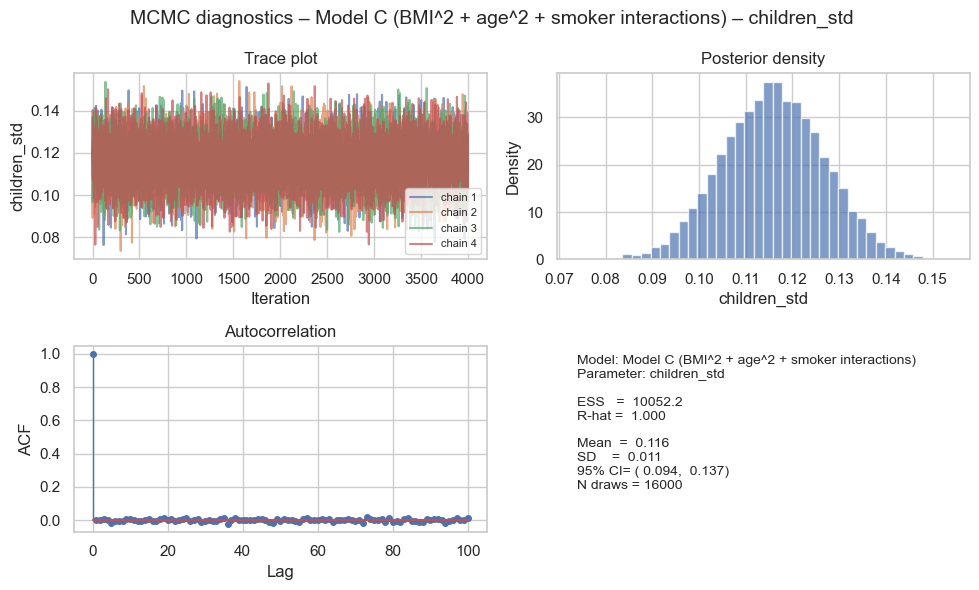

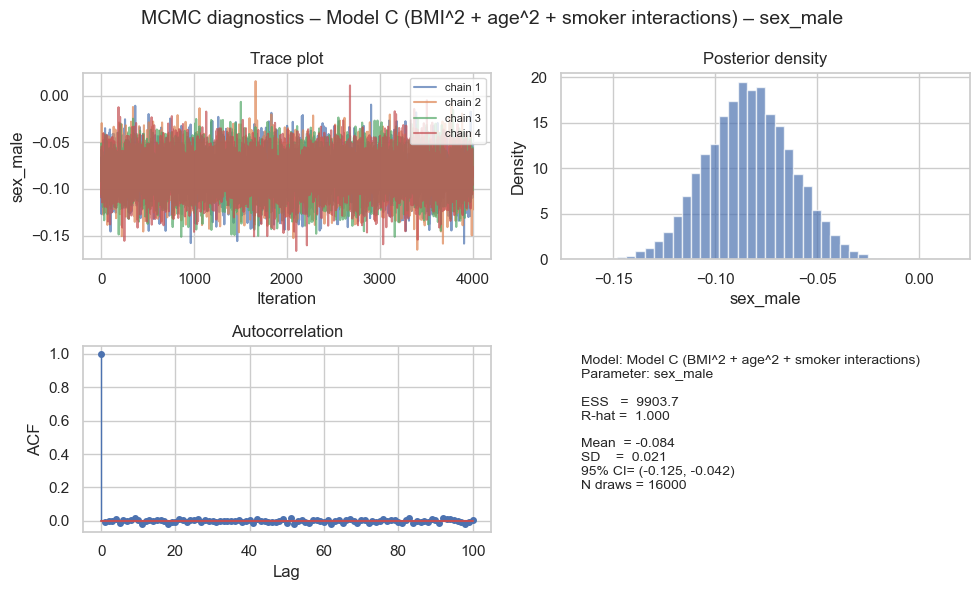

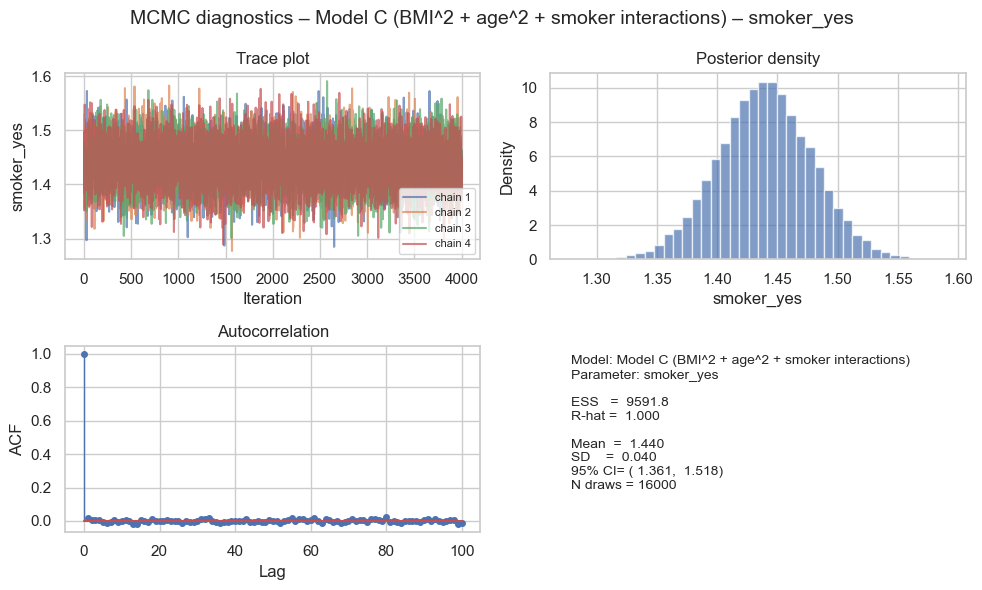

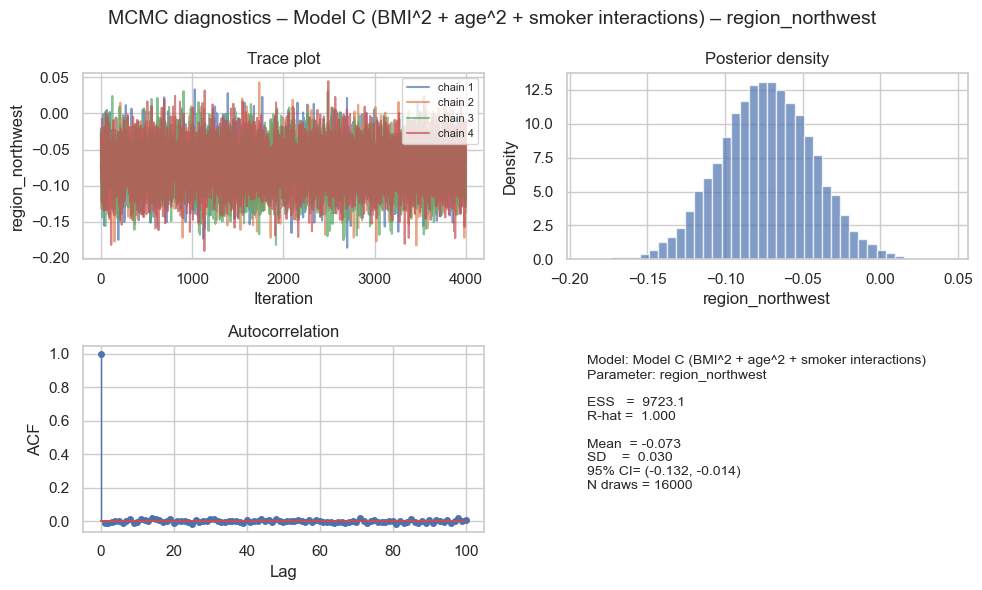

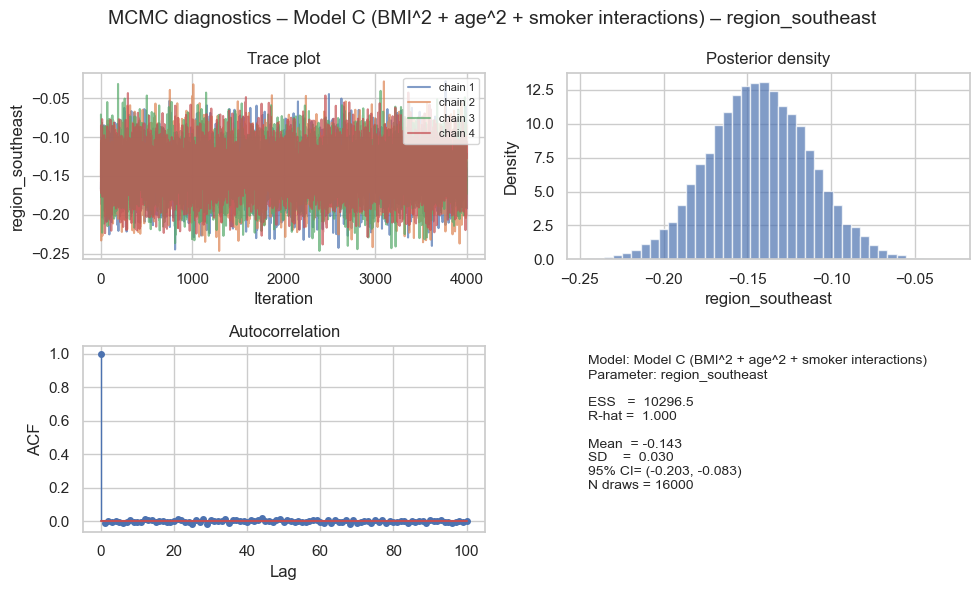

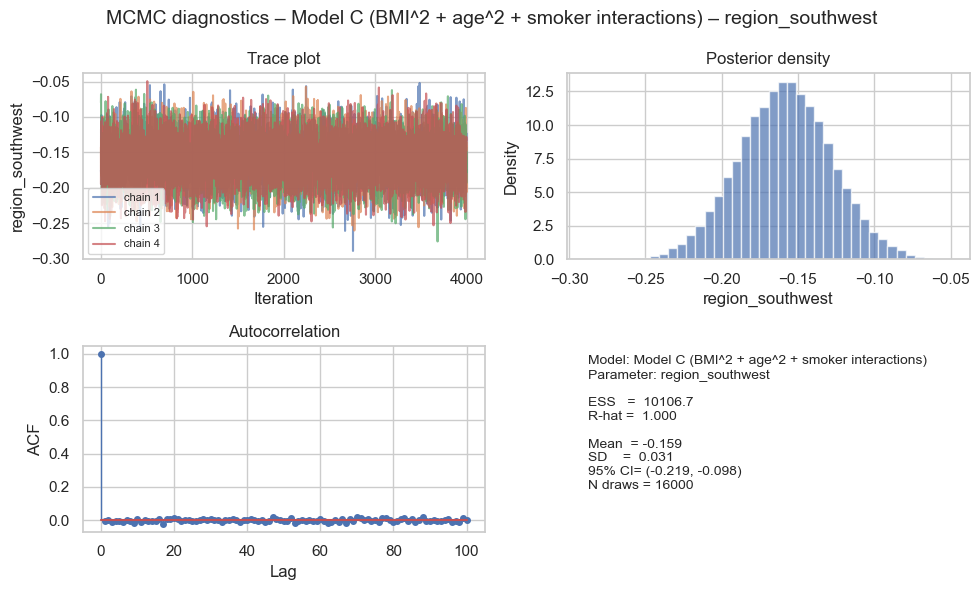

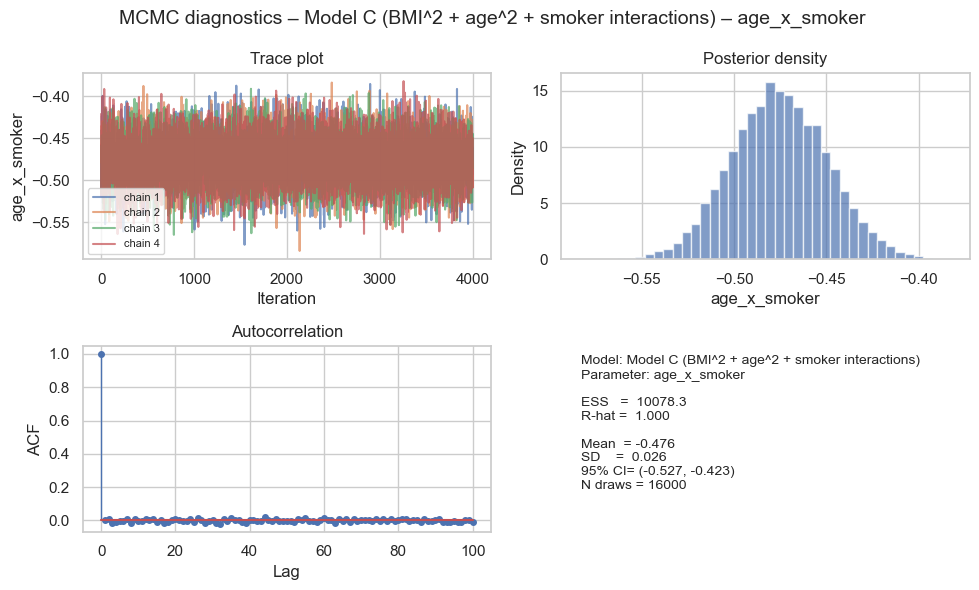

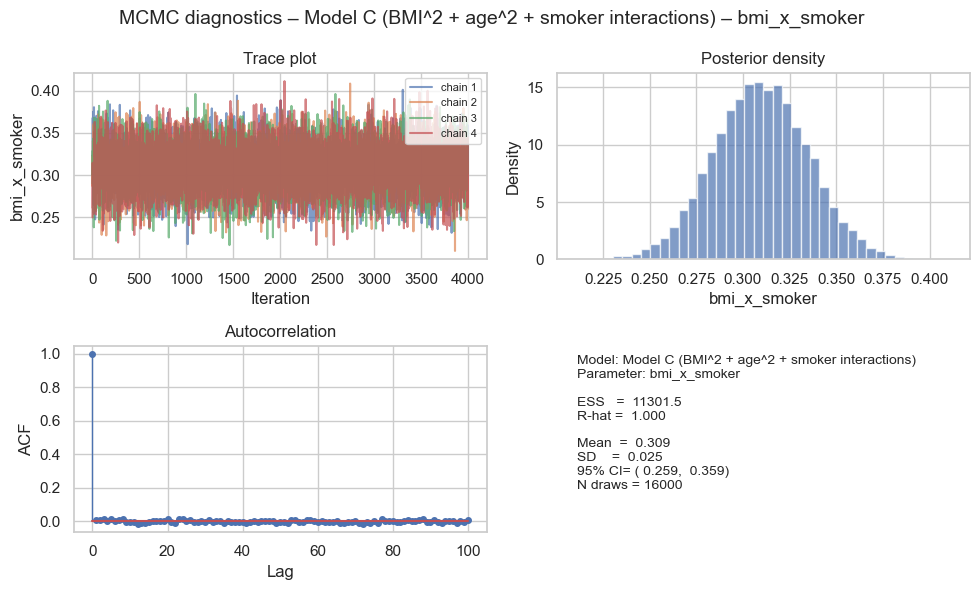

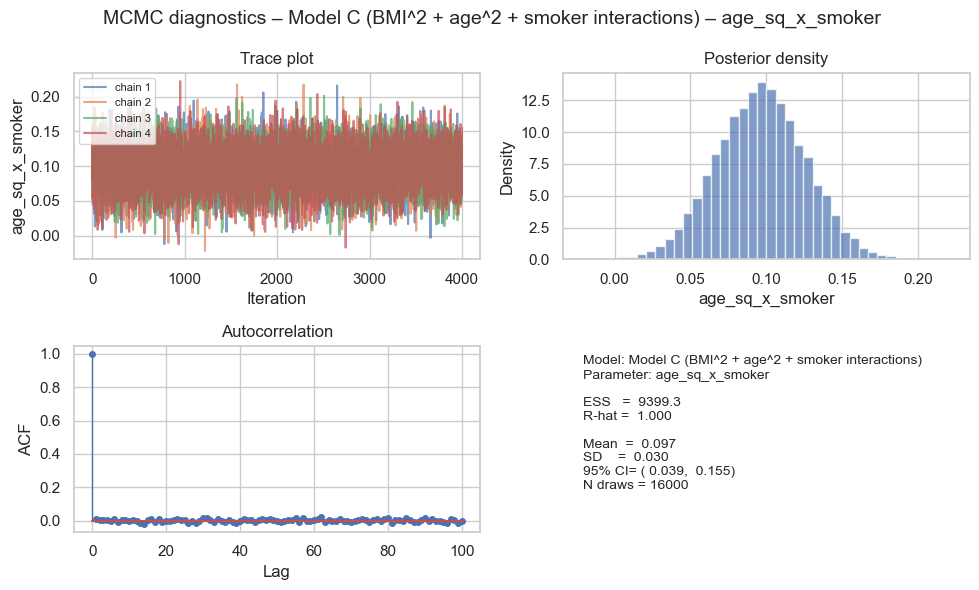

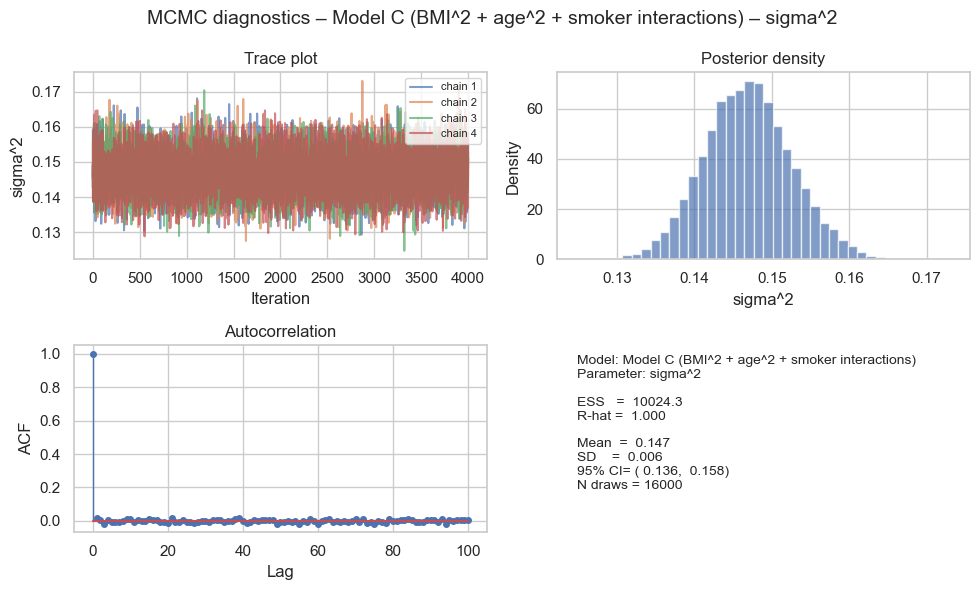


Summary of MCMC diagnostics for all parameters:
       parameter          ESS     Rhat
           alpha 10106.970141 0.999929
         age_std  9691.993772 1.000016
      age_std_sq 10058.379216 0.999899
         bmi_std 10224.666791 1.000040
      bmi_std_sq 10385.547616 1.000111
    children_std 10052.192252 1.000129
        sex_male  9903.734979 0.999890
      smoker_yes  9591.820297 0.999938
region_northwest  9723.105017 1.000144
region_southeast 10296.471647 1.000065
region_southwest 10106.717645 0.999890
    age_x_smoker 10078.331395 0.999948
    bmi_x_smoker 11301.462885 0.999957
 age_sq_x_smoker  9399.256045 0.999947
         sigma^2 10024.334767 1.000060

Posterior predictive performance for Model A (main effects):
  RMSE (charges) = 8,365.13
  MAE  (charges) = 4,220.19
  Empirical coverage of 95% PI = 93.6%


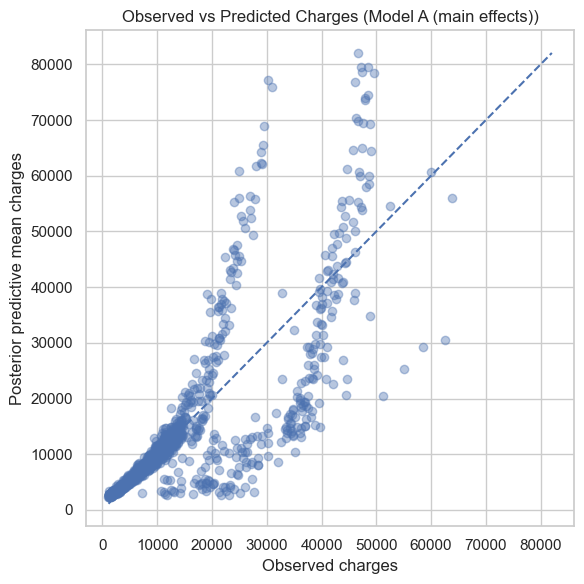

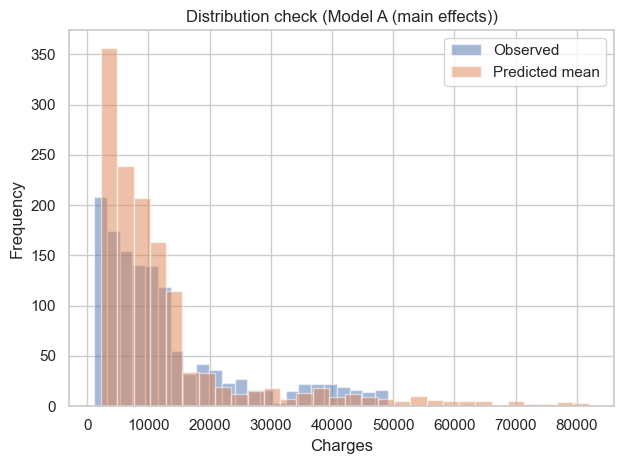


Posterior predictive performance for Model C (BMI^2 + age^2 + smoker interactions):
  RMSE (charges) = 5,206.74
  MAE  (charges) = 2,691.42
  Empirical coverage of 95% PI = 94.7%


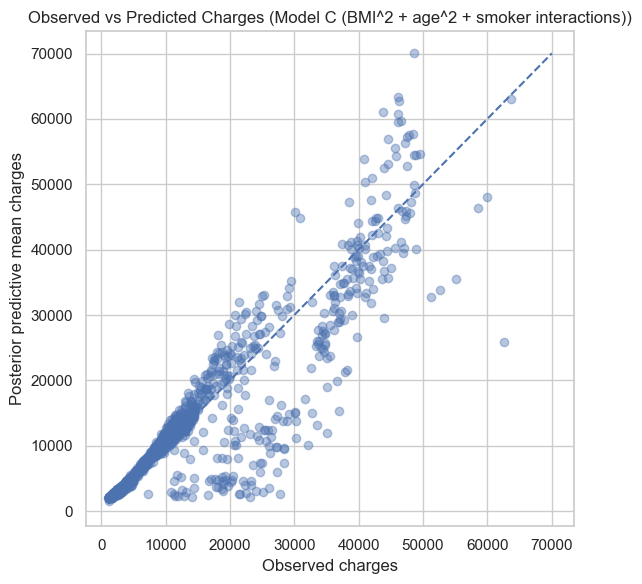

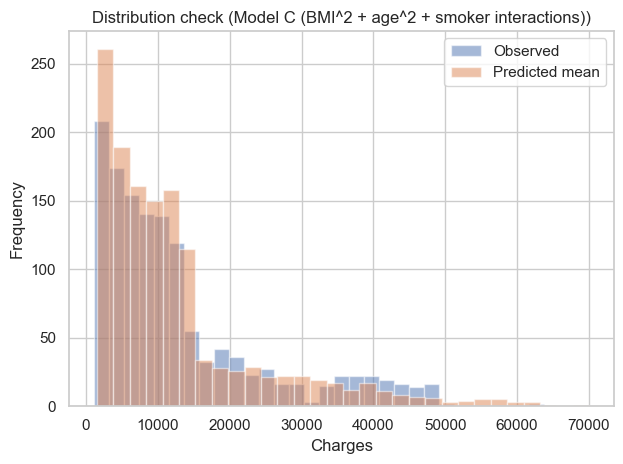


====== MODEL COMPARISON (A and C) ======
Model A: RMSE=8,365.13, coverage=93.6%
Model C: RMSE=5,206.74, coverage=94.7%


In [13]:

# =============================================================================
# 7. RUN MODELS A and C
# =============================================================================
modelA = run_gibbs_model(y, X_A, param_names_A,
                         model_label="Model A (main effects)")
modelC = run_gibbs_model(y, X_C, param_names_C,
                         model_label="Model C (BMI^2 + age^2 + smoker interactions)")

ppc_A = posterior_predictive(modelA, y)
ppc_C = posterior_predictive(modelC, y)

print("\n====== MODEL COMPARISON (A and C) ======")
print(f"Model A: RMSE={ppc_A['rmse']:,.2f}, coverage={ppc_A['coverage']*100:.1f}%")
print(f"Model C: RMSE={ppc_C['rmse']:,.2f}, coverage={ppc_C['coverage']*100:.1f}%")



Running model: Model S_non (non-smokers like C)
Prior scale for beta: N(0, 100.0^2)
Chain 1/4...
Chain 2/4...
Chain 3/4...
Chain 4/4...

MCMC sample size for Model S_non (non-smokers like C): 16000 draws

Convergence diagnostics (ESS, R-hat, ACF, trace) for ALL parameters:


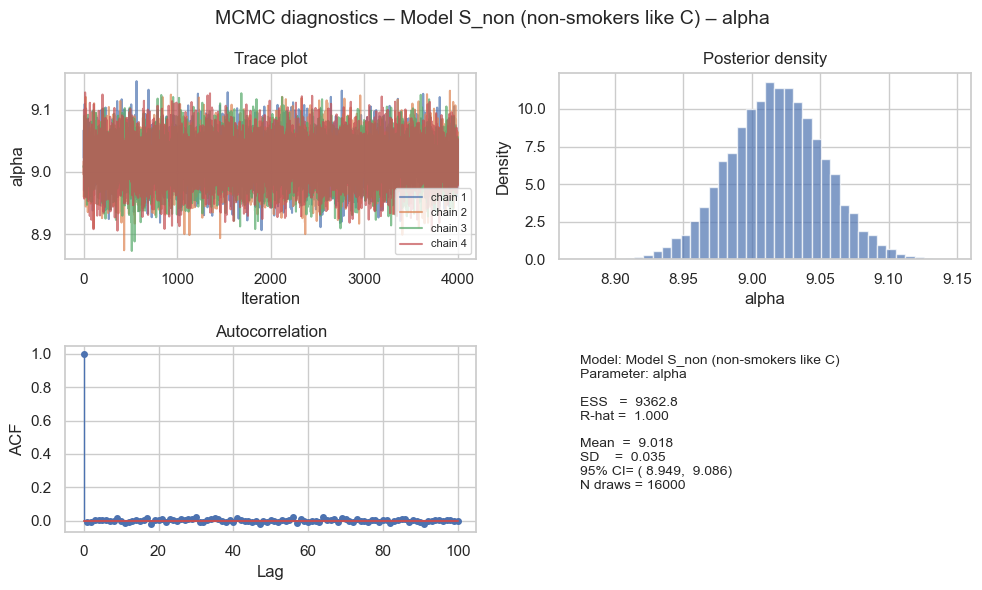

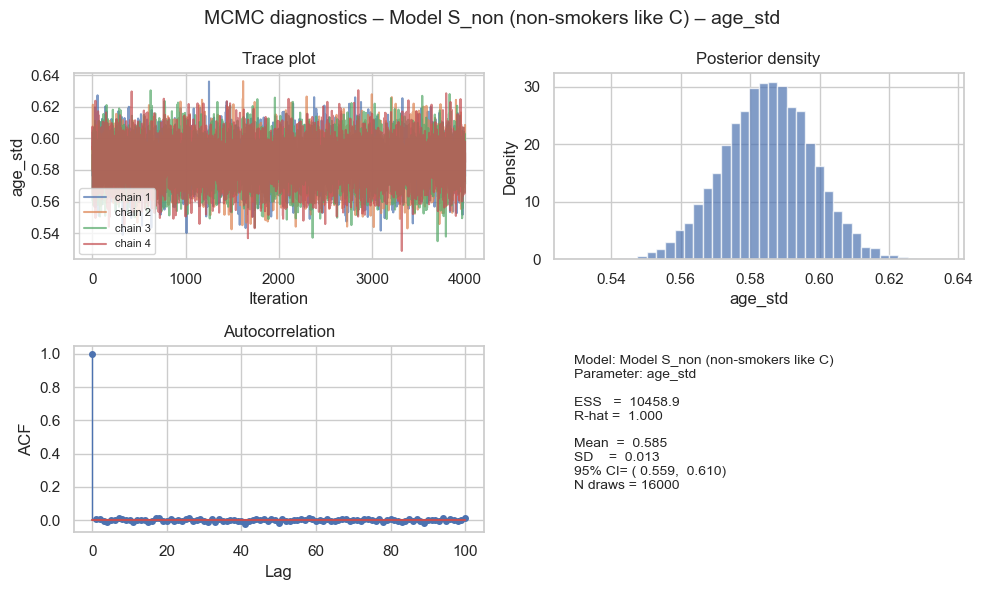

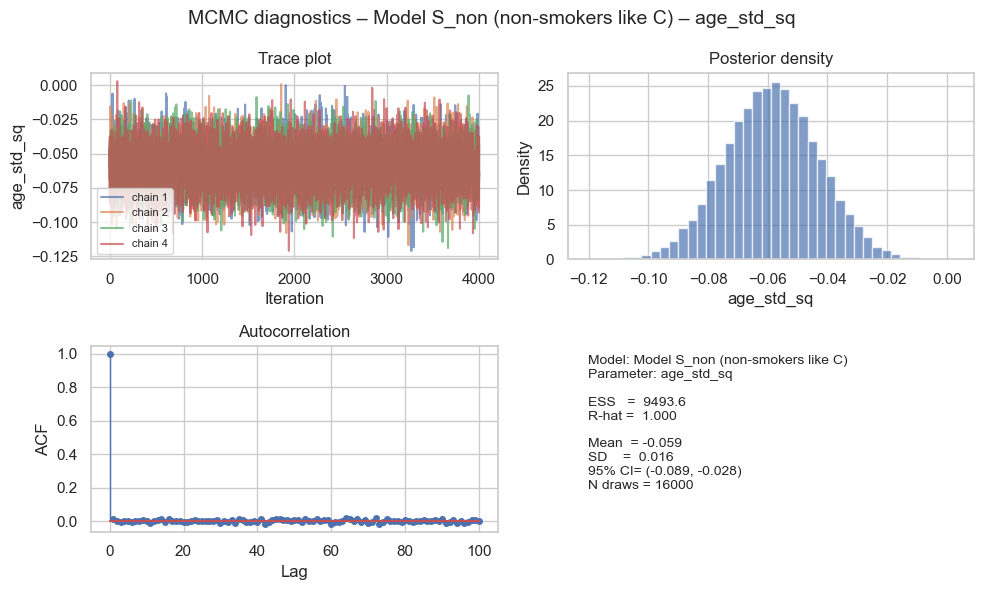

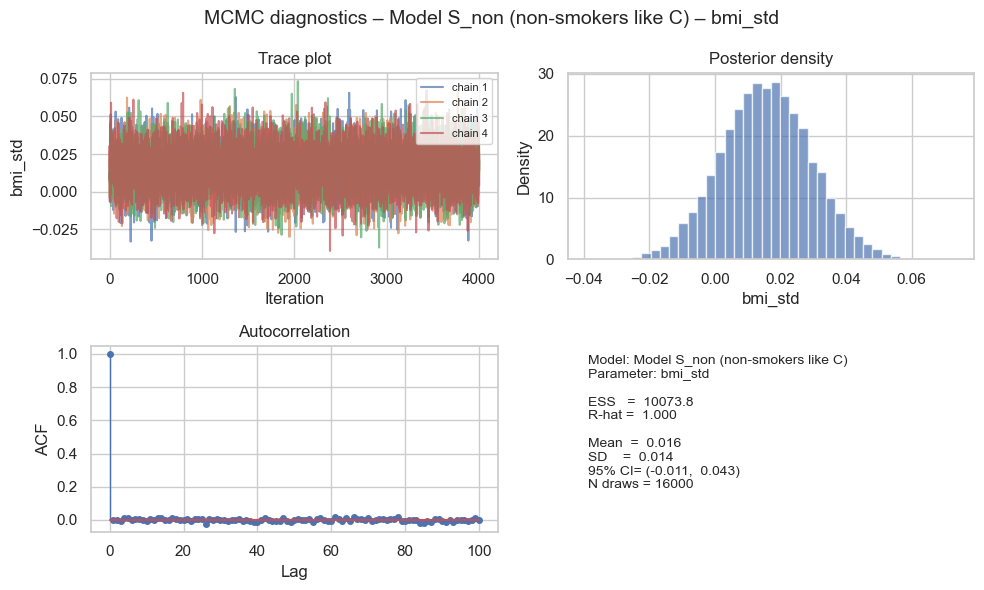

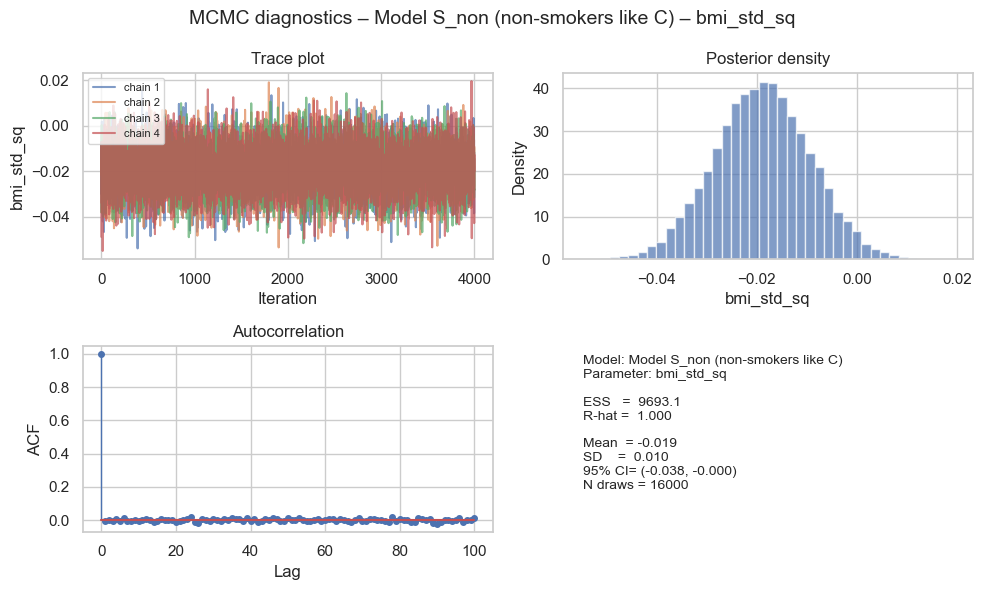

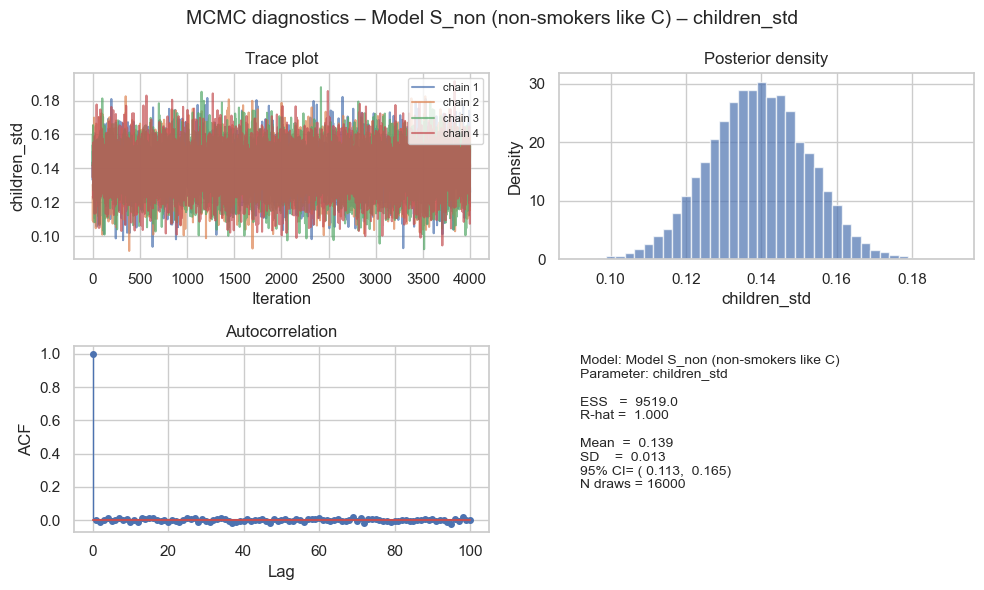

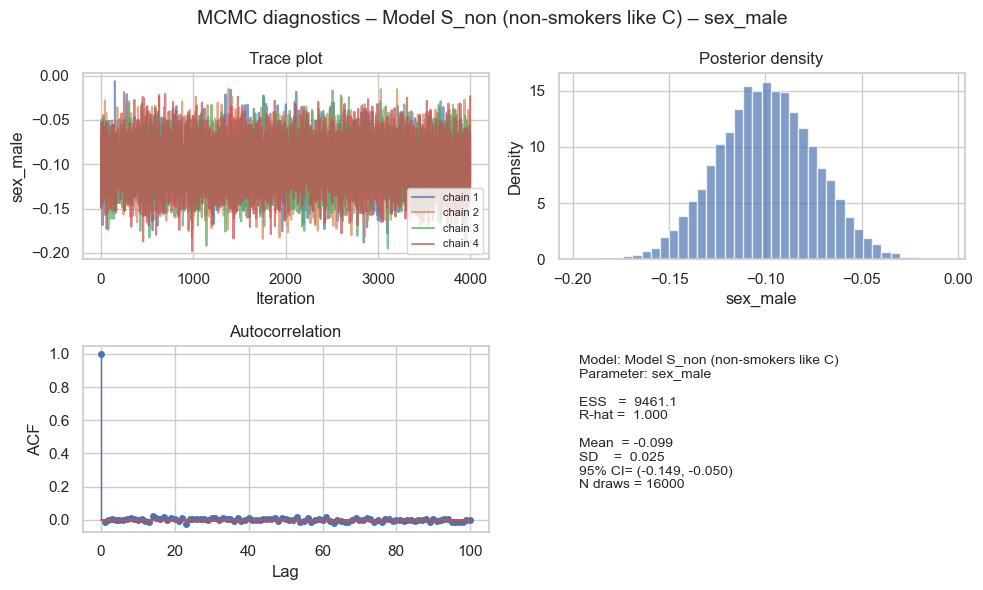

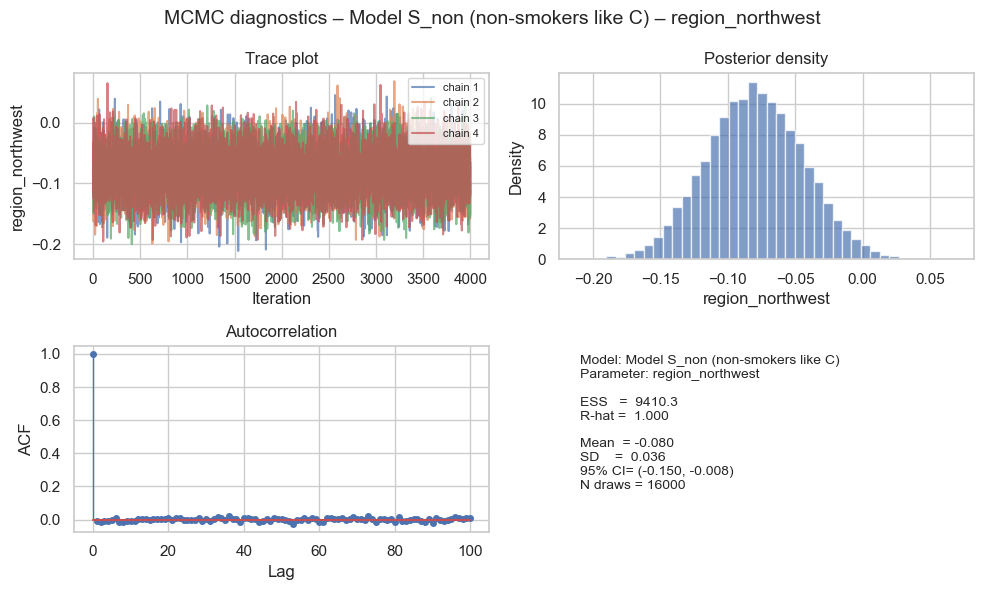

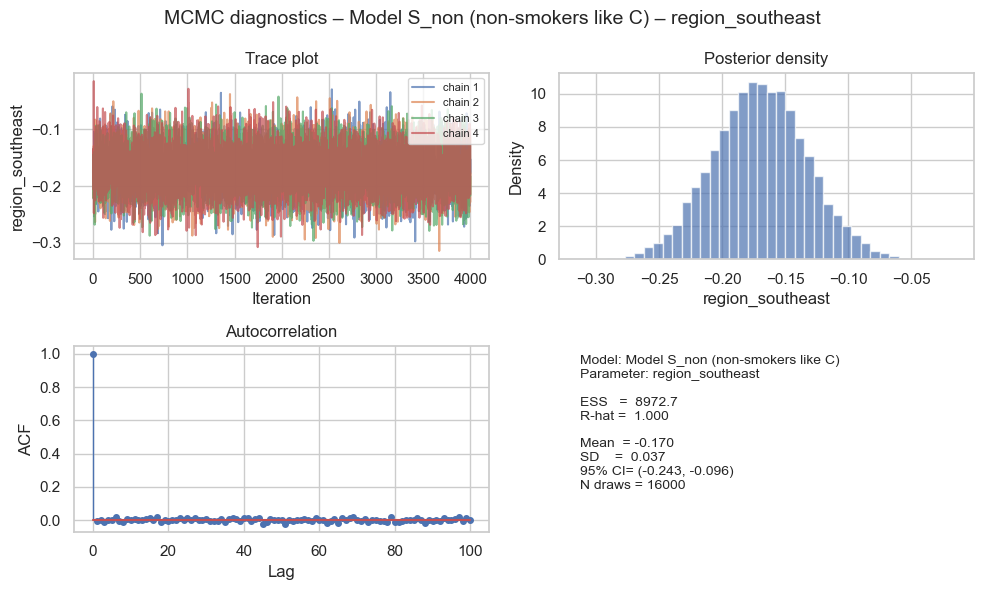

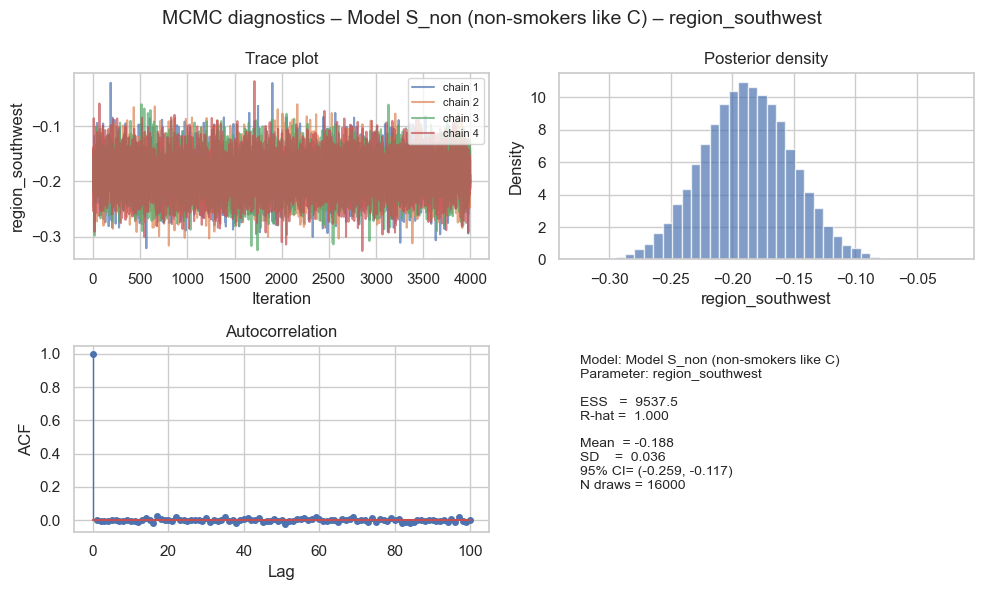

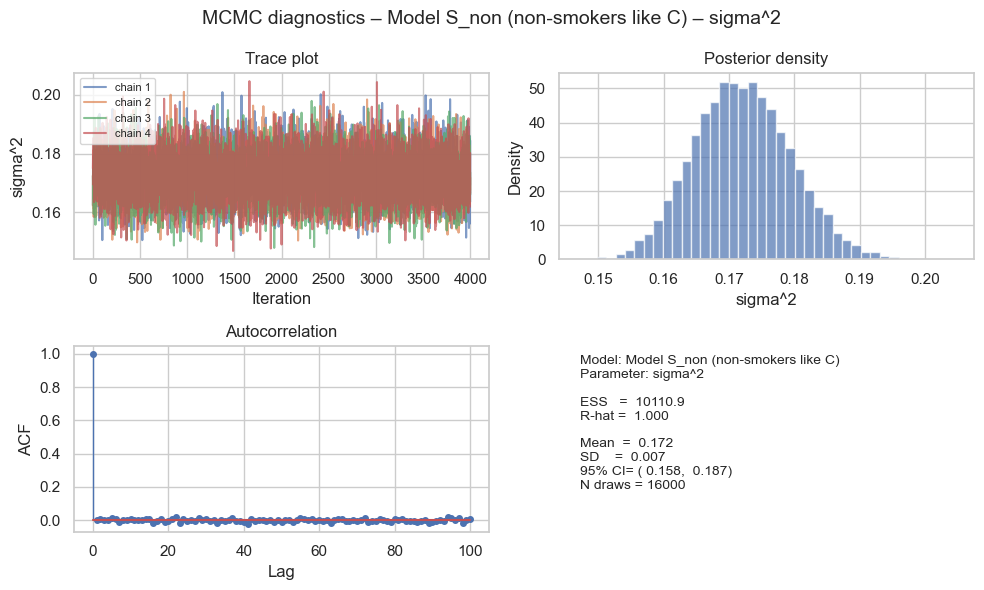


Summary of MCMC diagnostics for all parameters:
       parameter          ESS     Rhat
           alpha  9362.824796 0.999919
         age_std 10458.936639 0.999962
      age_std_sq  9493.638236 0.999945
         bmi_std 10073.805041 0.999996
      bmi_std_sq  9693.113561 0.999918
    children_std  9518.957059 1.000018
        sex_male  9461.076525 0.999888
region_northwest  9410.258175 0.999935
region_southeast  8972.694679 1.000025
region_southwest  9537.483794 0.999941
         sigma^2 10110.909719 1.000139

Posterior predictive performance for Model S_non (non-smokers like C):
  RMSE (charges) = 4,640.95
  MAE  (charges) = 2,056.14
  Empirical coverage of 95% PI = 93.7%


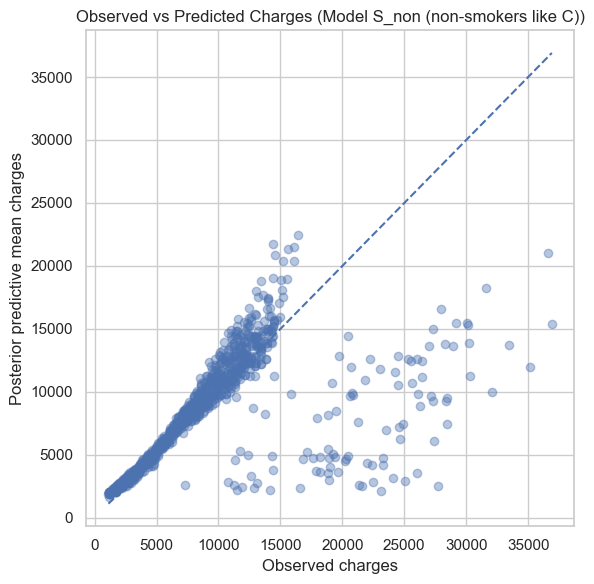

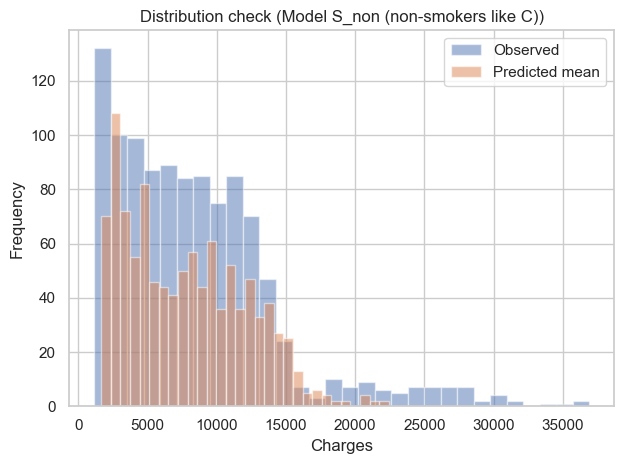


====== MODEL S PERFORMANCE ======
Non-smokers: RMSE=4,640.95, coverage=93.7%


In [14]:

# =============================================================================
# 8. MODEL S: SEPARATE SMOKER / NON-SMOKER MODELS (based on Model C structure)
# =============================================================================
smoker_mask = (df["smoker"] == "yes")
non_mask = ~smoker_mask

cols_C = X_full_C.columns.tolist()

# For non-smokers: drop smoker-related columns (always 0)
drop_non = [c for c in cols_C if "smoker_yes" in c or "_x_smoker" in c]
cols_non = [c for c in cols_C if c not in drop_non]

X_non = pd.concat(
    [
        df.loc[non_mask, ["age_std", "age_std_sq", "bmi_std", "bmi_std_sq", "children_std"]],
        X_cat.loc[non_mask, :]
    ],
    axis=1
)
X_non = X_non[cols_non]
X_non_mat = np.column_stack([np.ones(X_non.shape[0]), X_non.to_numpy()])
y_non = df.loc[non_mask, "log_charges"].values
param_names_non = ["alpha"] + cols_non

X_smoker = X_full_C.loc[smoker_mask, :]
X_smoker_mat = np.column_stack([np.ones(X_smoker.shape[0]), X_smoker.to_numpy()])
y_smoker = df.loc[smoker_mask, "log_charges"].values
param_names_smoker = ["alpha"] + cols_C

modelS_non = run_gibbs_model(y_non, X_non_mat, param_names_non,
                             model_label="Model S_non (non-smokers like C)")
# modelS_smoker = run_gibbs_model(y_smoker, X_smoker_mat, param_names_smoker,
#                                 model_label="Model S_smoker (smokers like C)")

ppc_S_non = posterior_predictive(modelS_non, y_non)
# ppc_S_smoker = posterior_predictive(modelS_smoker, y_smoker)

print("\n====== MODEL S PERFORMANCE ======")
print(f"Non-smokers: RMSE={ppc_S_non['rmse']:,.2f}, coverage={ppc_S_non['coverage']*100:.1f}%")
# print(f"Smokers:     RMSE={ppc_S_smoker['rmse']:,.2f}, coverage={ppc_S_smoker['coverage']*100:.1f}%")


In [15]:
print("\n====== MODEL COMPARISON ======")
print(f"Model A: RMSE={ppc_A['rmse']:,.2f}, coverage={ppc_A['coverage']*100:.1f}%")
print(f"Model C: RMSE={ppc_C['rmse']:,.2f}, coverage={ppc_C['coverage']*100:.1f}%")
print(f"S_non:   RMSE={ppc_S_non['rmse']:,.2f}, coverage={ppc_S_non['coverage']*100:.1f}%")
# print(f"S_smok:  RMSE={ppc_S_smoker['rmse']:,.2f}, coverage={ppc_S_smoker['coverage']*100:.1f}%")



====== MODEL COMPARISON ======
Model A: RMSE=8,365.13, coverage=93.6%
Model C: RMSE=5,206.74, coverage=94.7%
S_non:   RMSE=4,640.95, coverage=93.7%



Running model: Model S_smoker_plus (t-reg + splines + interaction)
Student-t df nu = 3.0
Prior scale for beta: N(0, 30.0^2)
Chain 1/4...
Chain 2/4...
Chain 3/4...
Chain 4/4...

MCMC sample size for Model S_smoker_plus (t-reg + splines + interaction): 16000 draws

Convergence diagnostics (ESS, R-hat, ACF, trace) for ALL parameters:


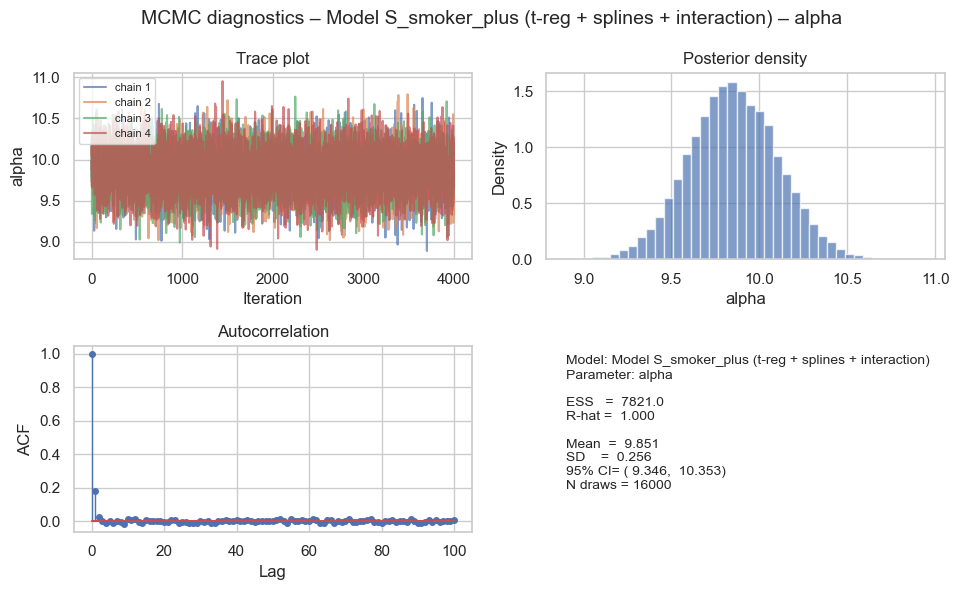

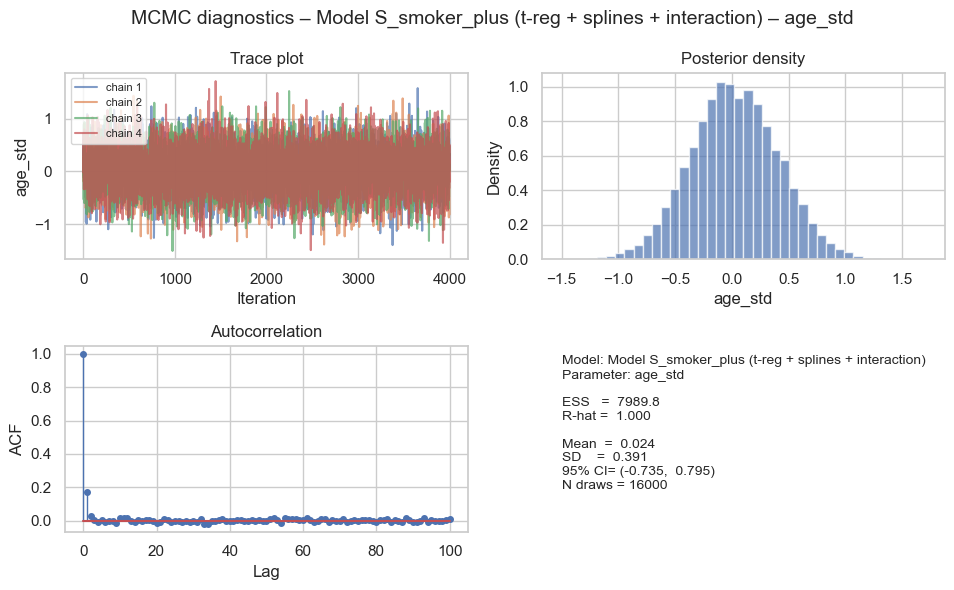

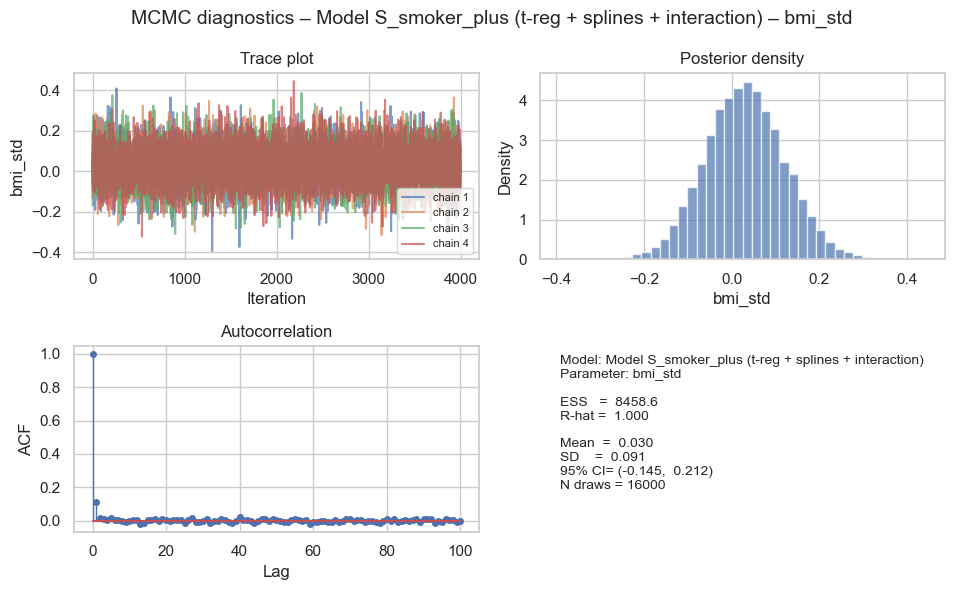

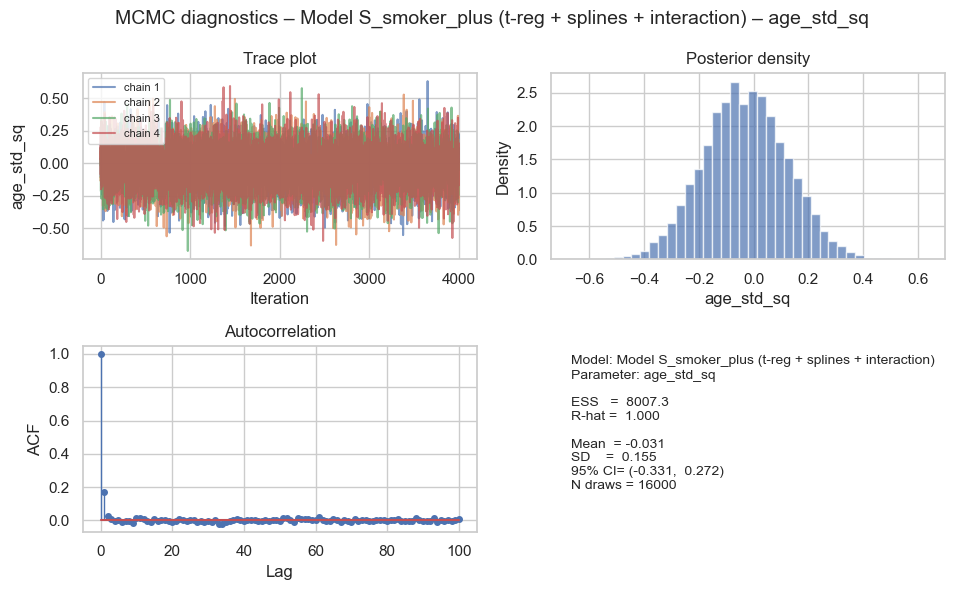

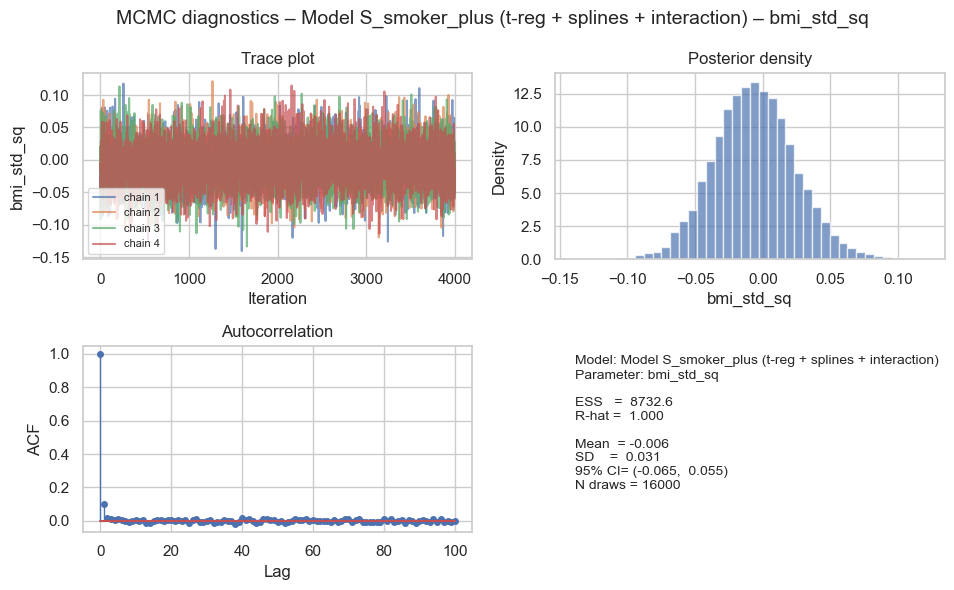

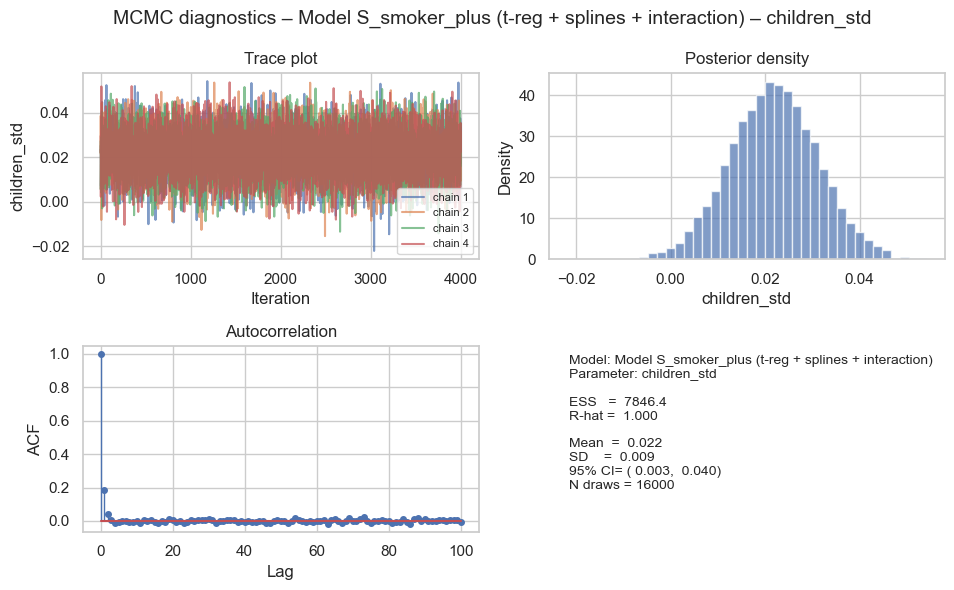

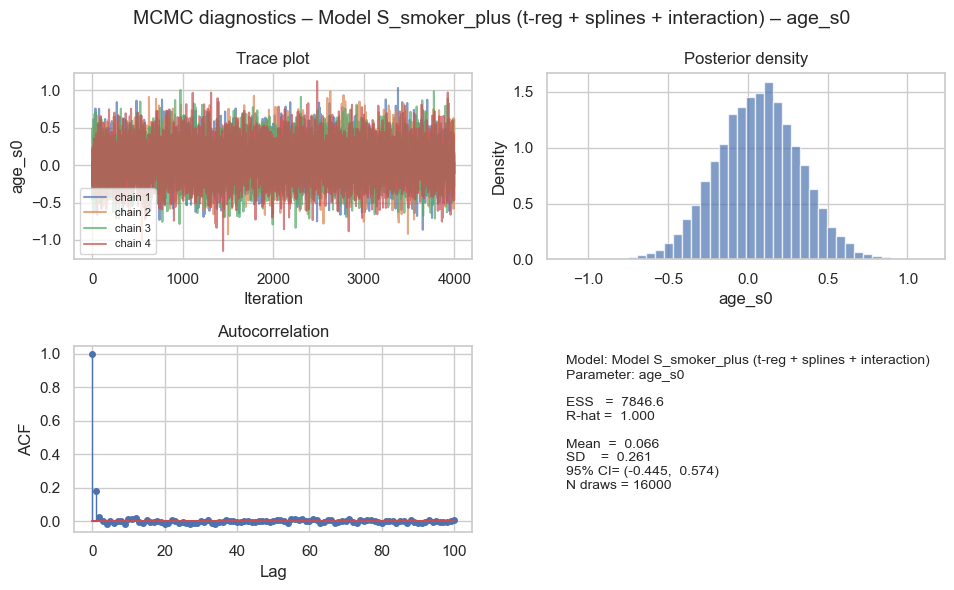

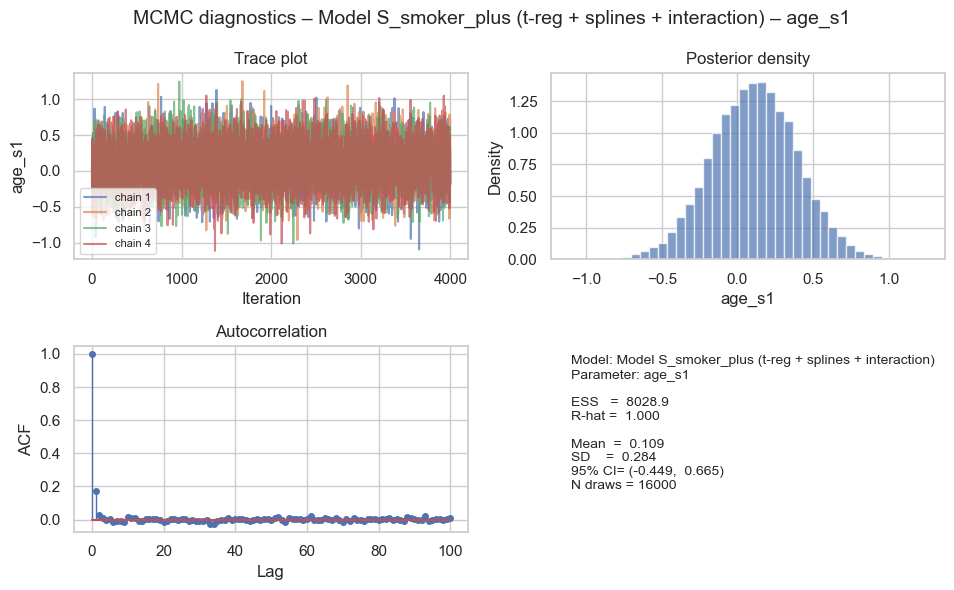

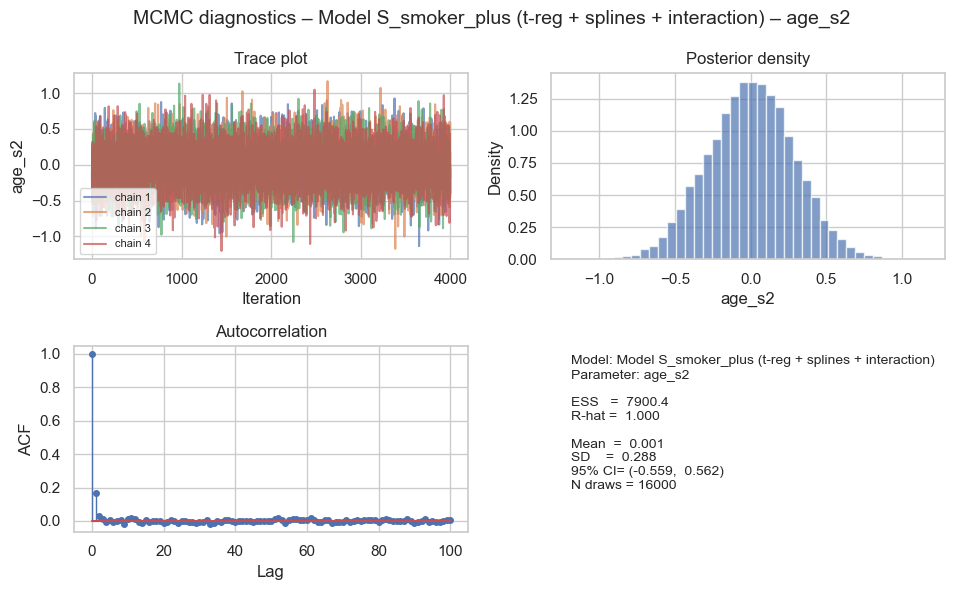

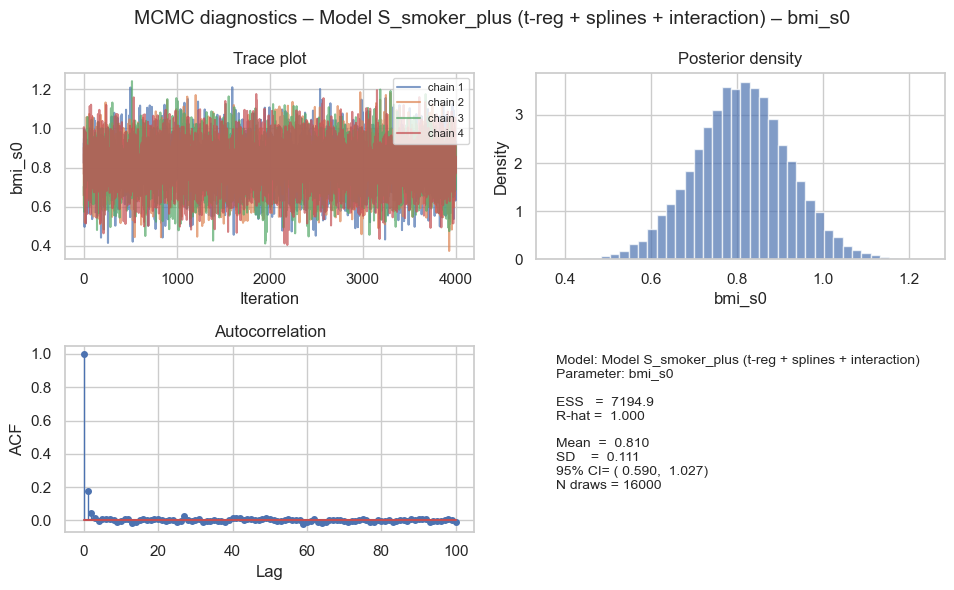

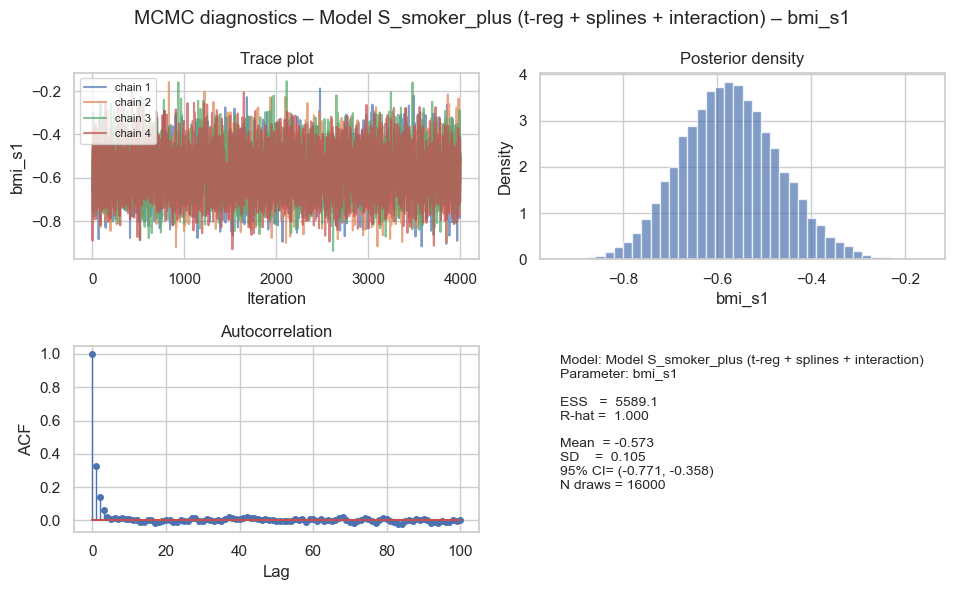

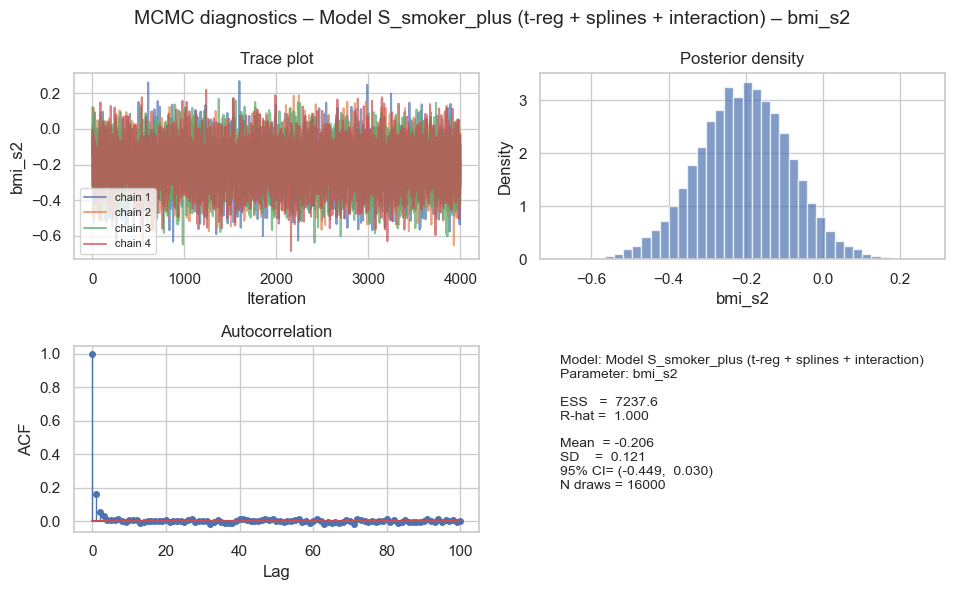

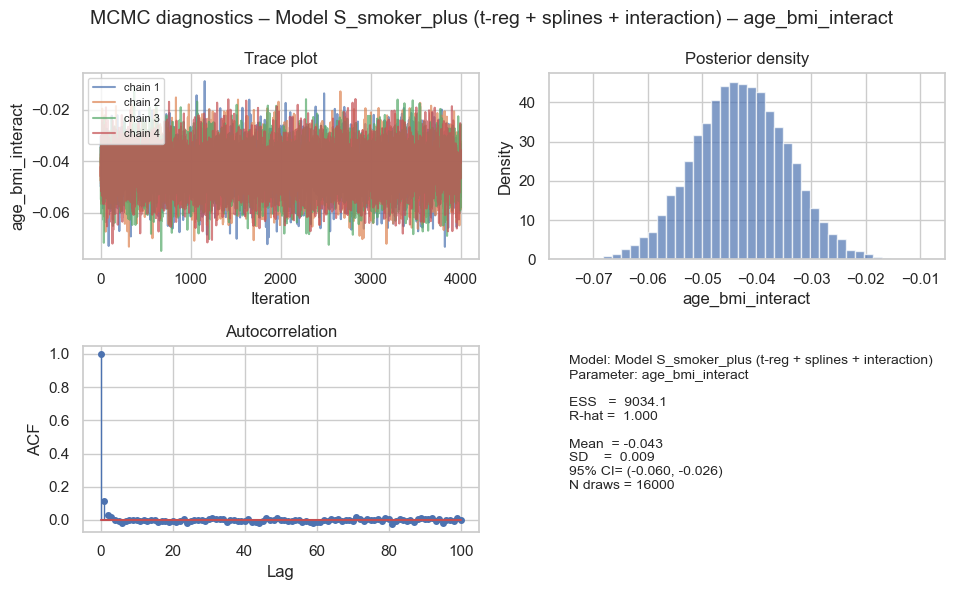

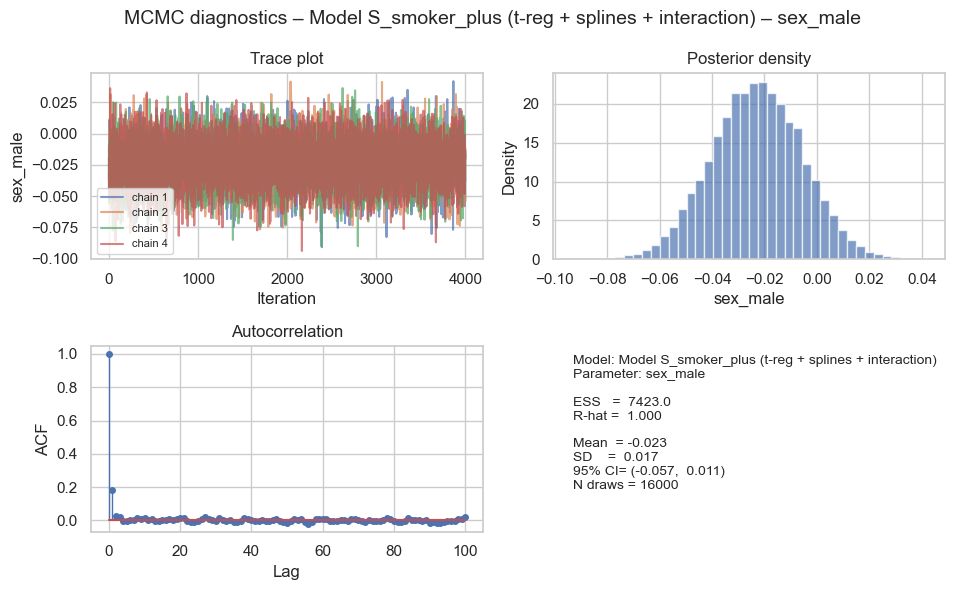

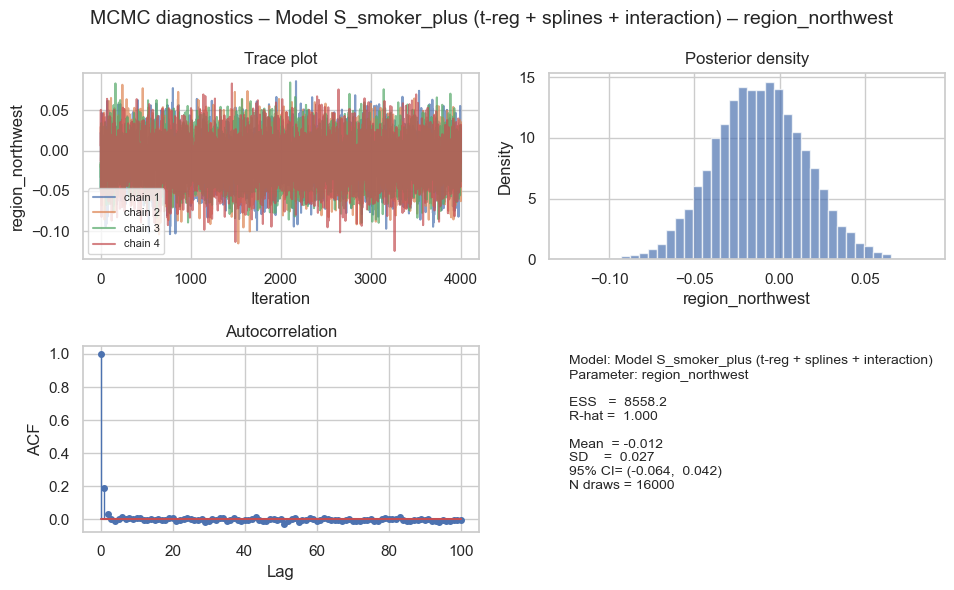

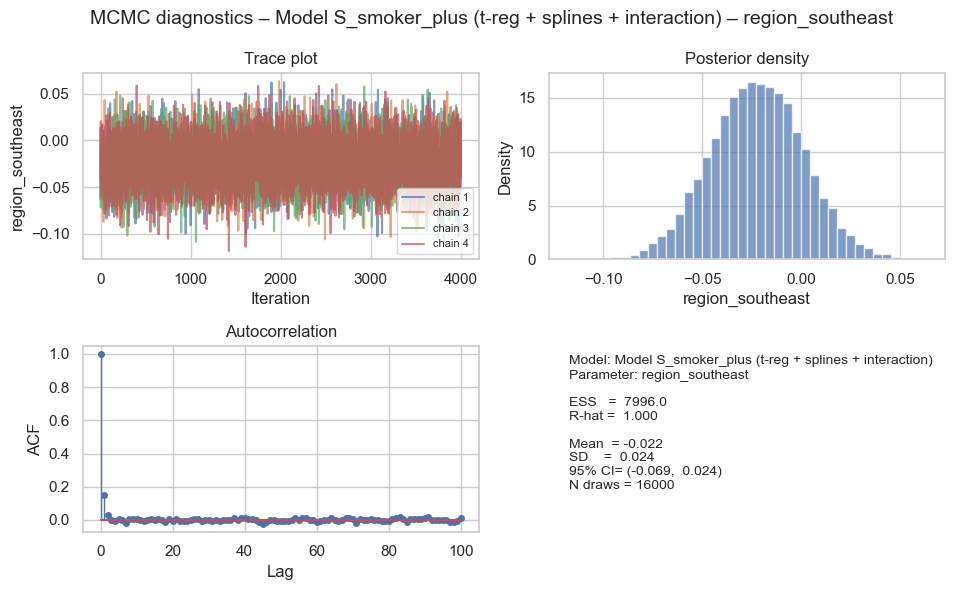

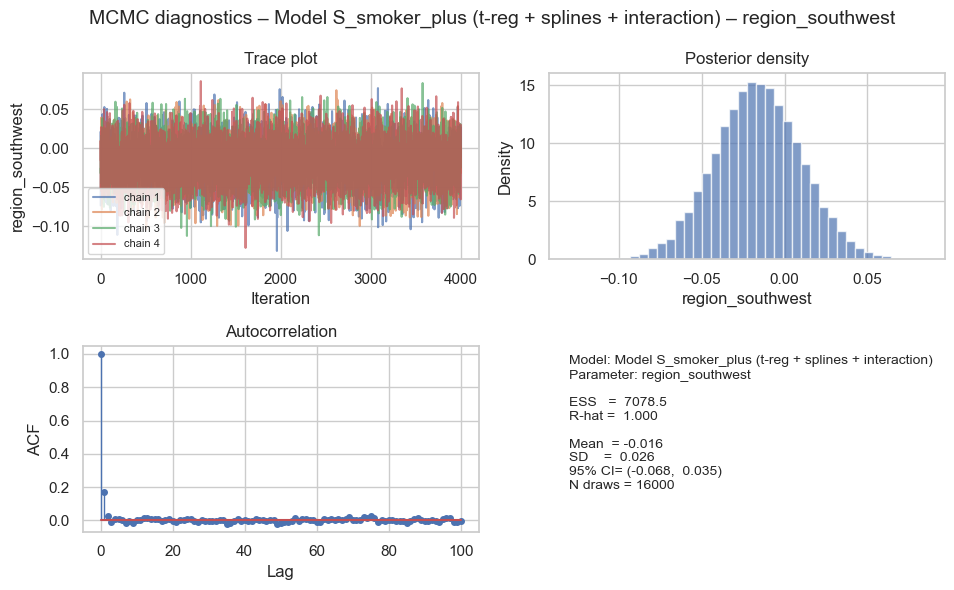

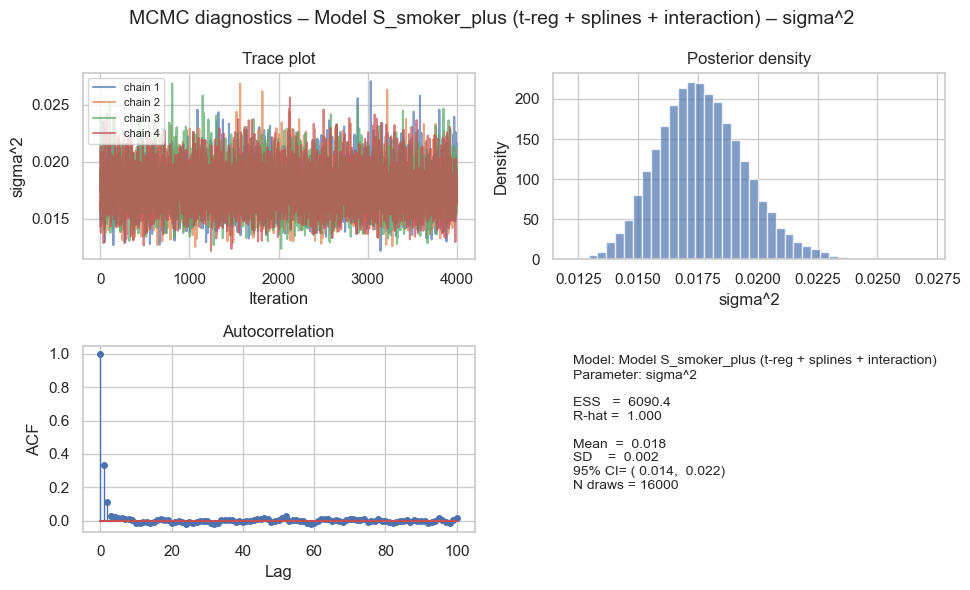


Summary of MCMC diagnostics for all parameters:
       parameter         ESS     Rhat
           alpha 7821.043388 0.999957
         age_std 7989.776864 0.999926
         bmi_std 8458.624497 0.999926
      age_std_sq 8007.340435 0.999907
      bmi_std_sq 8732.635437 0.999918
    children_std 7846.377257 1.000168
          age_s0 7846.581559 0.999947
          age_s1 8028.862088 0.999902
          age_s2 7900.426774 0.999933
          bmi_s0 7194.880075 0.999909
          bmi_s1 5589.089329 1.000200
          bmi_s2 7237.644565 0.999968
age_bmi_interact 9034.065074 0.999997
        sex_male 7422.986124 1.000204
region_northwest 8558.245870 1.000195
region_southeast 7996.000211 0.999904
region_southwest 7078.507412 0.999917
         sigma^2 6090.379351 1.000219

Posterior predictive performance for Model S_smoker_plus (t-reg + splines + interaction):
  RMSE (charges) = 4,507.30
  MAE  (charges) = 2,593.43
  Empirical coverage of 95% PI = 97.4%


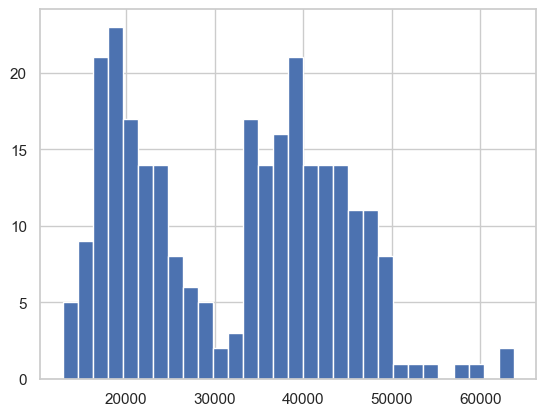

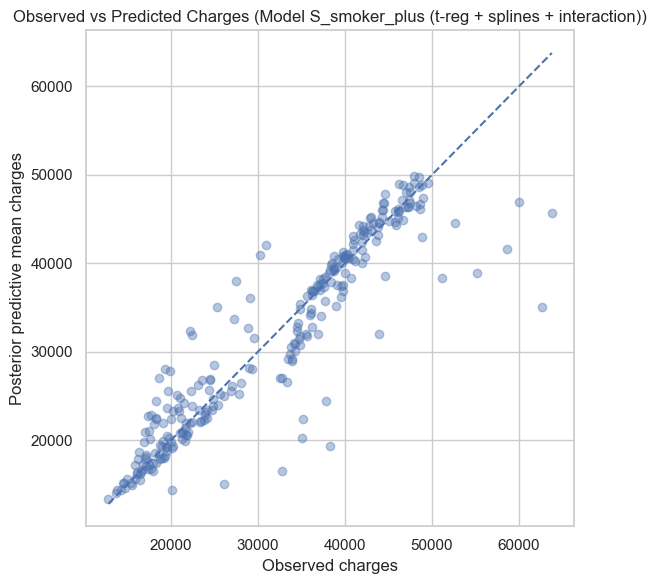

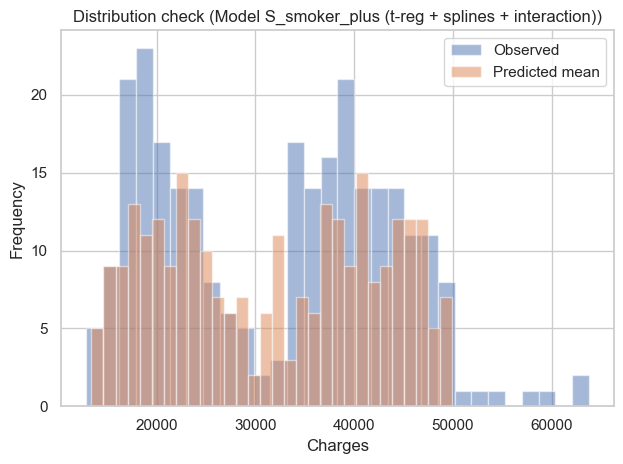


Smoker_plus RMSE = 4507.299269212292


In [16]:
# ===============================================================
# MODEL S_smoker_plus: Student-t + Splines + BMI*Age interaction
# ===============================================================

age_knots = np.quantile(df["age_std"], [0.25, 0.5, 0.75])
bmi_knots = np.quantile(df["bmi_std"], [0.25, 0.5, 0.75])

df["age_s0"] = np.maximum(df["age_std"] - age_knots[0], 0.0)
df["age_s1"] = np.maximum(df["age_std"] - age_knots[1], 0.0)
df["age_s2"] = np.maximum(df["age_std"] - age_knots[2], 0.0)
df["bmi_s0"] = np.maximum(df["bmi_std"] - bmi_knots[0], 0.0)
df["bmi_s1"] = np.maximum(df["bmi_std"] - bmi_knots[1], 0.0)
df["bmi_s2"] = np.maximum(df["bmi_std"] - bmi_knots[2], 0.0)

# --- Smoker subset ---
sm = df["smoker"] == "yes"

X_sm_plus = pd.DataFrame({
    "age_std": df.loc[sm, "age_std"],
    "bmi_std": df.loc[sm, "bmi_std"],
    "age_std_sq": df.loc[sm, "age_std_sq"],
    "bmi_std_sq": df.loc[sm, "bmi_std_sq"],
    "children_std": df.loc[sm, "children_std"],

    # splines
    "age_s0": df.loc[sm, "age_s0"],
    "age_s1": df.loc[sm, "age_s1"],
    "age_s2": df.loc[sm, "age_s2"],
    "bmi_s0": df.loc[sm, "bmi_s0"],
    "bmi_s1": df.loc[sm, "bmi_s1"],
    "bmi_s2": df.loc[sm, "bmi_s2"],

    # NEW: nonlinear interaction
    "age_bmi_interact": df.loc[sm, "age_std"] * df.loc[sm, "bmi_std"],

    # region + sex
    "sex_male": X_cat.loc[sm, "sex_male"],
    "region_northwest": X_cat.loc[sm, "region_northwest"],
    "region_southeast": X_cat.loc[sm, "region_southeast"],
    "region_southwest": X_cat.loc[sm, "region_southwest"],
})

X_sm_plus_mat = np.column_stack([
    np.ones(X_sm_plus.shape[0]),
    X_sm_plus.to_numpy()
])

y_sm_plus = df.loc[sm, "log_charges"].values
param_names_sm_plus = ["alpha"] + list(X_sm_plus.columns)

# ---- Run Student-t Gibbs ----
modelS_smoker_plus = run_gibbs_model_student(
    y_sm_plus,
    X_sm_plus_mat,
    param_names_sm_plus,
    model_label="Model S_smoker_plus (t-reg + splines + interaction)",
    nu=3.0,           # heavier tails than model D
    m0_scale=30.0     # LESS variance → stabilizes small smoker data
)
plt.hist(df.loc[df["smoker"]=="yes", "charges"], bins=30)
ppc_S_smoker_plus = posterior_predictive(modelS_smoker_plus, y_sm_plus)
print("\nSmoker_plus RMSE =", ppc_S_smoker_plus["rmse"])
